# Project Description

Who doesn’t love food? All of us must have craving for at least a few favourite food items, we may also have a few places where we like to get them, a restaurant which serves our favourite food the way we want it to be. But there is one factor that will make us reconsider having our favourite food from our favourite restaurant, the cost. Here in this hackathon, you will be predicting the cost of the food served by the restaurants across different cities in India. You will use your Data Science skills to investigate the factors that really affect the cost, and who knows maybe you will even gain some very interesting insights that might help you choose what to eat and from where.

 In these Datasets we predict the cost of restaurant food

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Importing Datasets

In [2]:
import pandas as pd

# Try reading with 'latin-1' encoding
df = pd.read_csv("C:/Users/ssour/OneDrive/Documents/Data_Train.csv", encoding='latin-1')
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am  4pm, 7:30pm  11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm  11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am  3:30pm, 7pm  11pm (Mon-Sun)",Chennai,Saligramam,3.8,221.0,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am  1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800
4,DESSERT PARLOR,15387,Desserts,11am  1am (Mon-Sun),Mumbai,Lower Parel,3.8,165.0,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon  12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546.0,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon  1am (Mon-Fri),11am  5pm, 7pm  1am...",Mumbai,Bandra Kurla Complex,4.3,1214.0,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon  12:30AM (Mon-Sun),Navi Mumbai,Vashi,4,608.0,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am  10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32.0,400


In [3]:
# Here the top 10 data in these datasets
df.head(10)

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am  4pm, 7:30pm  11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm  11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am  3:30pm, 7pm  11pm (Mon-Sun)",Chennai,Saligramam,3.8,221.0,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am  1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800
4,DESSERT PARLOR,15387,Desserts,11am  1am (Mon-Sun),Mumbai,Lower Parel,3.8,165.0,300
5,CASUAL DINING,5618,"North Indian, Chinese, Seafood, Biryani",12noon  12:30AM (Mon-Sun),Mumbai,Vile Parle West,4,550.0,800
6,CAFÉ,4383,"Cafe, Chinese, Pizza, North Indian, Burger","12noon  11:30pm (Mon, Tue, Thu, Fri, Sat, Sun...",Bangalore,Koramangala 6th Block,4.1,509.0,600
7,MICROBREWERY,1249,Bar Food,1pm  1am (Mon-Sun),Gurgaon,Sector 29,4.3,1612.0,1600
8,QUICK BITES,7062,"South Indian, North Indian",7am  10:30pm (Mon-Sun),Bangalore,Bannerghatta Road,3.9,101.0,300
9,QUICK BITES,10109,North Indian,"11am  2pm, 4pm  10:30pm (Mon-Sun)",Hyderabad,Dilsukhnagar,3.3,219.0,200


In [4]:
# Here we can see that the columns
df.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

# Exploratory Data Analysis

In [5]:
df.shape

(12690, 9)

Here we can see that 12690 rows and 9 columns

In [6]:
print("The Dimensions of Datasets: ",df.shape)
print("The columns of the datasets: ",df.columns)

The Dimensions of Datasets:  (12690, 9)
The columns of the datasets:  Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')


In [7]:
df.describe()

,RESTAURANT_ID,VOTES,COST
count,12690.000000,11486.000000,12690.000000
mean,7759.134121,415.668901,655.252246
std,4504.874150,842.722909,627.003540
min,0.000000,4.000000,20.000000
25%,3863.250000,57.000000,300.000000
50%,7740.000000,163.000000,500.000000
75%,11688.750000,456.750000,800.000000
max,15573.000000,41186.000000,14000.000000


In [8]:
# Now checking the datatypes
df.dtypes

TITLE             object
RESTAURANT_ID      int64
CUISINES          object
TIME              object
CITY              object
LOCALITY          object
RATING            object
VOTES            float64
COST               int64
dtype: object

In [9]:
# Replace 'NEW' with 3 in 'RATING' column
df['RATING'] = df['RATING'].replace('NEW', 3)

# Fill null values in 'RATING' column with 3
df['RATING'] = df['RATING'].fillna(3)

# Convert 'RATING' column to float
df['RATING'] = pd.to_numeric(df['RATING'], errors='coerce')

print("\nDataFrame after converting 'RATING' to float:")
print(df)
print("\nData types:")
print(df.dtypes)


DataFrame after converting 'RATING' to float:
                   TITLE  RESTAURANT_ID  \
0          CASUAL DINING           9438   
1      CASUAL DINING,BAR          13198   
2          CASUAL DINING          10915   
3            QUICK BITES           6346   
4         DESSERT PARLOR          15387   
...                  ...            ...   
12685        QUICK BITES          13228   
12686  CASUAL DINING,BAR           9686   
12687             LOUNGE          11133   
12688      CASUAL DINING           6134   
12689      CASUAL DINING           6430   

                                               CUISINES  \
0                           Malwani, Goan, North Indian   
1                        Asian, Modern Indian, Japanese   
2            North Indian, Chinese, Biryani, Hyderabadi   
3                                      Tibetan, Chinese   
4                                              Desserts   
...                                                 ...   
12685                  

In [10]:
# Now separating categorical columns and numercial columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("Categorical_col :",categorical_col)

numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numercial_col :",numerical_col)

Categorical_col : ['TITLE', 'CUISINES', 'TIME', 'CITY', 'LOCALITY']
Numercial_col : ['RESTAURANT_ID', 'RATING', 'VOTES', 'COST']


In [11]:
# Now we checking the number of uniques values
df.nunique().to_frame("No. of uniques values")

,No. of uniques values
TITLE,113
RESTAURANT_ID,11892
CUISINES,4155
TIME,2689
CITY,359
LOCALITY,1416
RATING,30
VOTES,1847
COST,86


In [12]:
# Now we cheking the null values
df.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING            495
VOTES            1204
COST                0
dtype: int64

<Axes: >

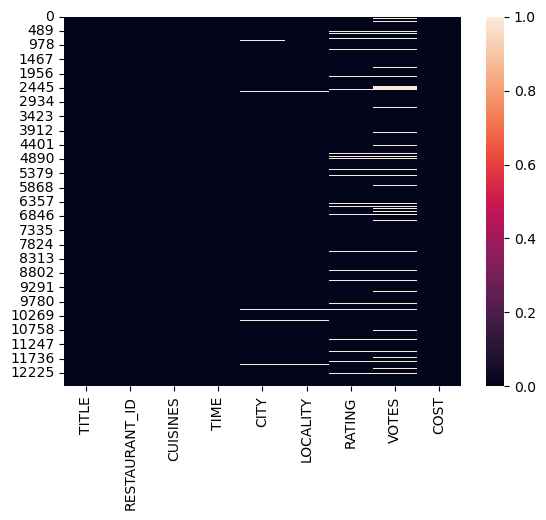

In [13]:
# Now check null values using heatmap
sns.heatmap(df.isnull())

Here we can see that some value is missing in these datasets so we add those values

In [14]:
# Count values of each columns
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

QUICK BITES                 4218
CASUAL DINING               3652
None                        1003
CAFÉ                         607
DESSERT PARLOR               382
                            ... 
QUICK BITES,BAR                1
MEAT SHOP                      1
SWEET SHOP,CONFECTIONERY       1
BEVERAGE SHOP,FOOD COURT       1
BAR,MICROBREWERY               1
Name: TITLE, Length: 113, dtype: int64


7264     8
4634     7
9910     6
11971    5
12747    5
        ..
9069     1
6573     1
7430     1
6381     1
6134     1
Name: RESTAURANT_ID, Length: 11892, dtype: int64


South Indian                                  532
North Indian                                  526
North Indian, Chinese                         501
Fast Food                                     286
Chinese                                       167
                                             ... 
Italian, Biryani, Fast Food                     1
Desserts, Juices, Fast Food                     1
Asian, Continental, Euro

In [15]:
# Now we cheking the null values
df.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING            495
VOTES            1204
COST                0
dtype: int64

Now we replace null of city columns into "Chennai"

In [16]:
# Filling null values in city columns with its more  values contains where chennai is more times comes
df['CITY'] = df['CITY'].fillna("Chennai")

In [17]:
# Handling locality null values
df['LOCALITY'] = df['LOCALITY'].fillna("Gachibowli")

In [18]:
# Handling votes null values
df['VOTES'] = df['VOTES'].fillna(500)

In [19]:
# Replace 'NEW' with 3 in 'RATING' column
df['RATING'] = df['RATING'].replace('NEW', 3)

# Fill null values in 'RATING' column with 3
df['RATING'] = df['RATING'].fillna(3)

# Convert 'RATING' column to float
df['RATING'] = pd.to_numeric(df['RATING'], errors='coerce')

print("\nDataFrame after converting 'RATING' to float:")
print(df)
print("\nData types:")
print(df.dtypes)


DataFrame after converting 'RATING' to float:
                   TITLE  RESTAURANT_ID  \
0          CASUAL DINING           9438   
1      CASUAL DINING,BAR          13198   
2          CASUAL DINING          10915   
3            QUICK BITES           6346   
4         DESSERT PARLOR          15387   
...                  ...            ...   
12685        QUICK BITES          13228   
12686  CASUAL DINING,BAR           9686   
12687             LOUNGE          11133   
12688      CASUAL DINING           6134   
12689      CASUAL DINING           6430   

                                               CUISINES  \
0                           Malwani, Goan, North Indian   
1                        Asian, Modern Indian, Japanese   
2            North Indian, Chinese, Biryani, Hyderabadi   
3                                      Tibetan, Chinese   
4                                              Desserts   
...                                                 ...   
12685                  

In [20]:
# Now we cheking the null values
df.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
dtype: int64

Here we can see that no null values present when we repalce the right values

<Axes: >

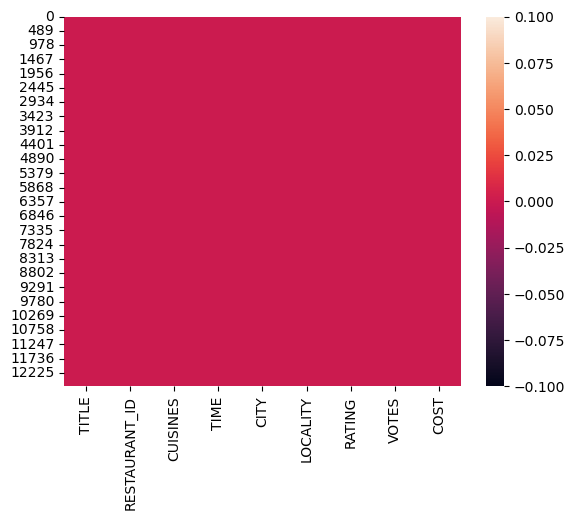

In [21]:
# Now again check the null values using heatmap
sns.heatmap(df.isnull())

In [22]:
# Now checking the datatypes
df.dtypes

TITLE             object
RESTAURANT_ID      int64
CUISINES          object
TIME              object
CITY              object
LOCALITY          object
RATING           float64
VOTES            float64
COST               int64
dtype: object

# Data Visualization

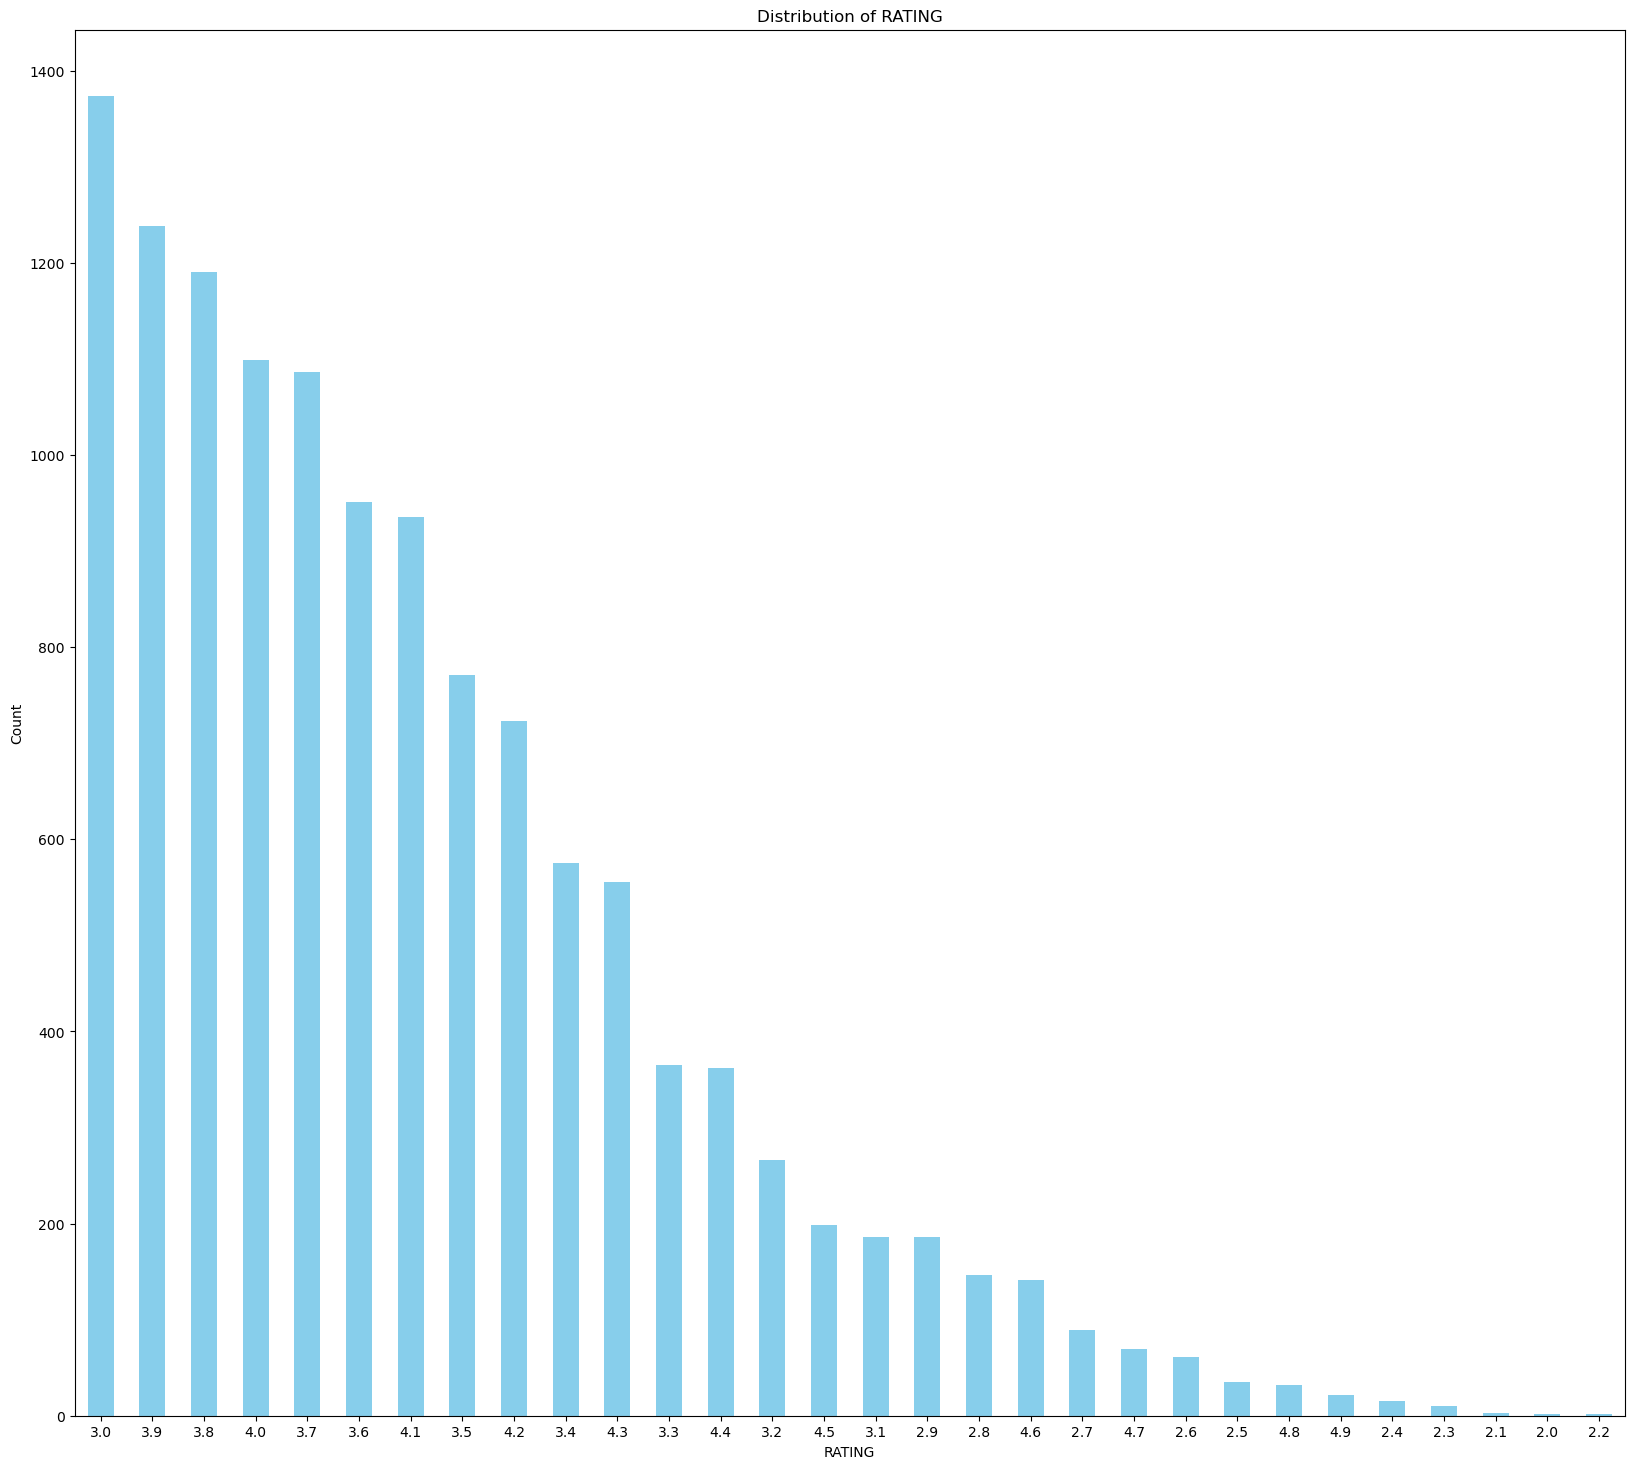

In [23]:
# Assuming df is your DataFrame and it has a column named 'job'
job_counts = df["RATING"].value_counts()

plt.figure(figsize=(20,18))
job_counts.plot(kind='bar', color='Skyblue')
plt.title("Distribution of RATING")
plt.xlabel("RATING")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

Here we can see that the dataset main, the one with rating 3 is the most frequent

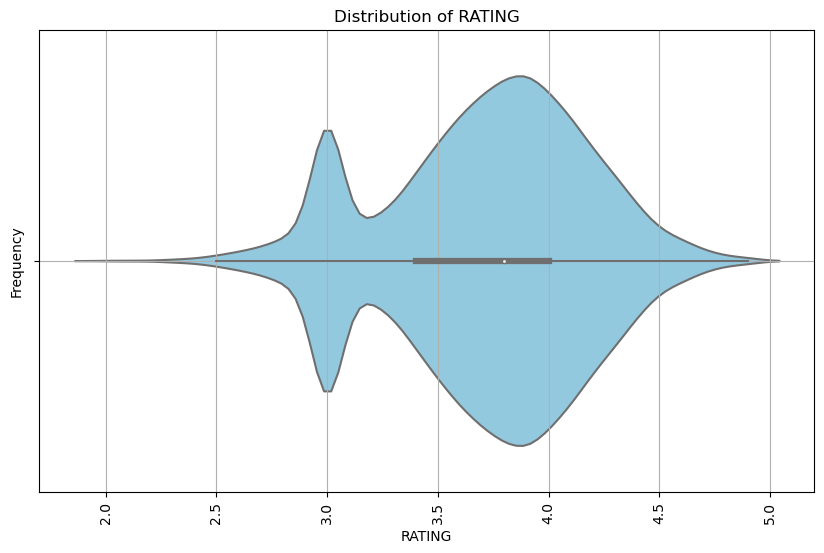

In [24]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['RATING'], color='skyblue')
plt.title('Distribution of RATING')
plt.xlabel('RATING')
plt.ylabel('Frequency')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()

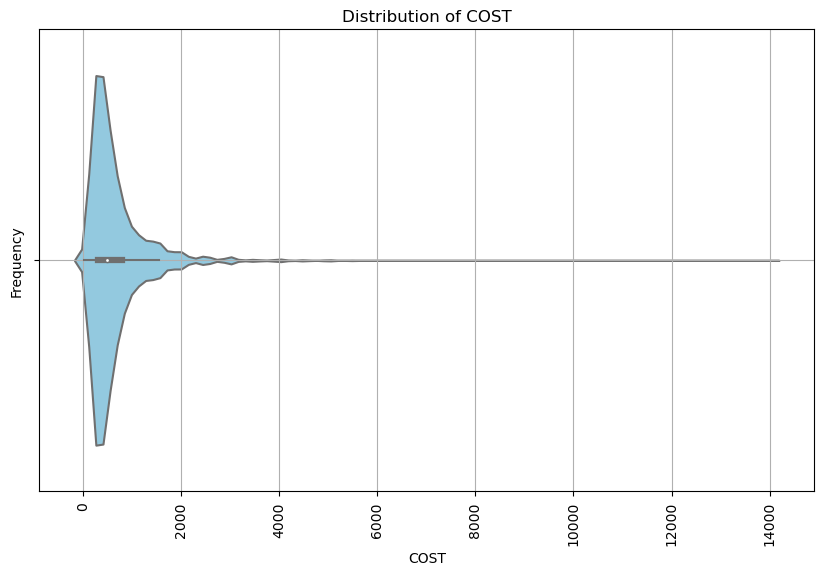

In [25]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['COST'], color='skyblue')
plt.title('Distribution of COST')
plt.xlabel('COST')
plt.ylabel('Frequency')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()

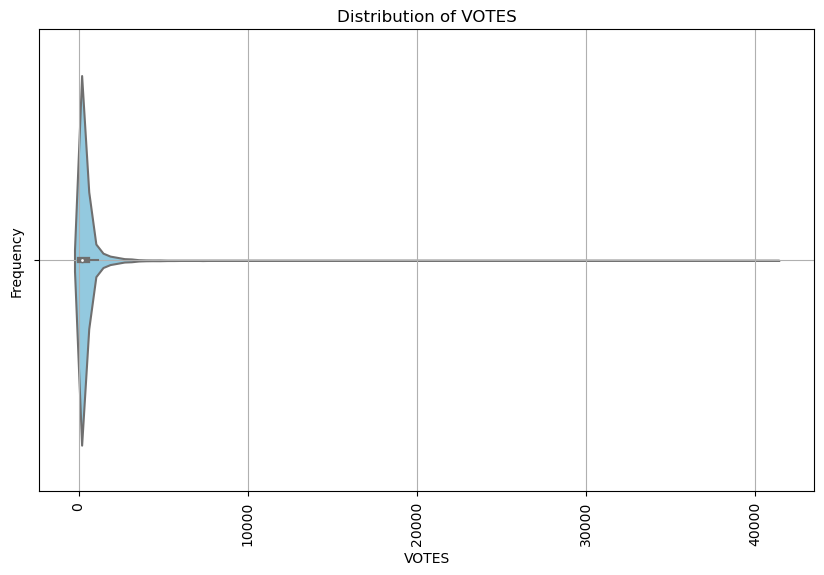

In [26]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['VOTES'], color='skyblue')
plt.title('Distribution of VOTES')
plt.xlabel('VOTES')
plt.ylabel('Frequency')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()

In [27]:
df.drop("CUISINES", axis=1, inplace=True)
df.drop("TIME", axis=1, inplace=True)

# Now cheking for outliers

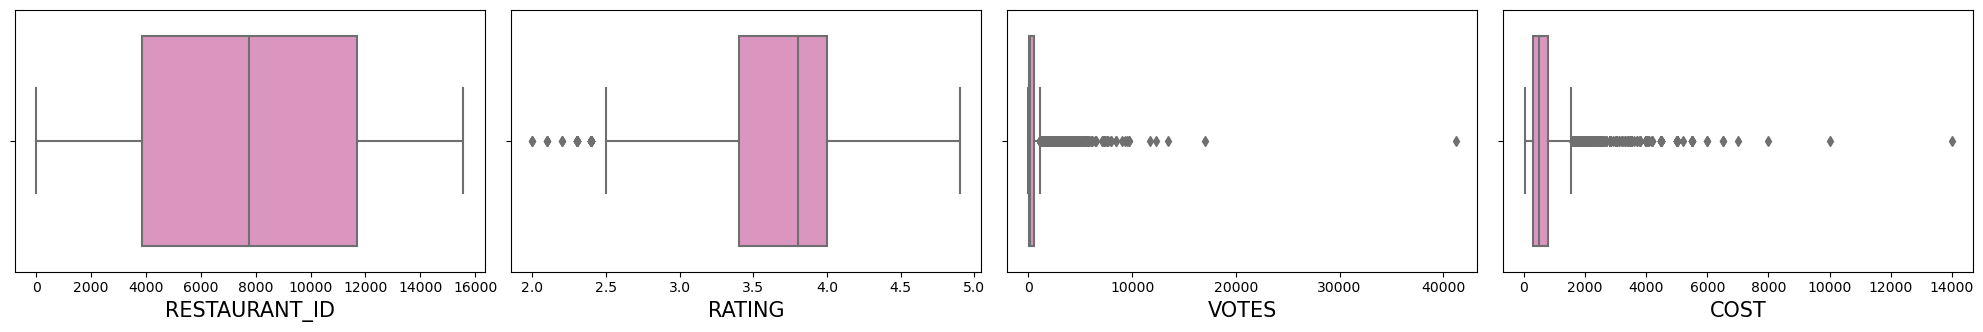

In [28]:
num_numerical_cols = len(numerical_col)
num_rows = 5  # Number of rows in the subplot grid
num_cols = 4  # Number of columns in the subplot grid
total_subplots = num_rows * num_cols

# Create a new figure and set its size
plt.figure(figsize=(20, 16), facecolor="white")  # Adjust the figure size as needed

# Iterate over numerical columns and create subplots for boxplots
plotnumber = 1
for col in numerical_col:
    if plotnumber <= total_subplots:
        # Create subplot at the specified position
        ax = plt.subplot(num_rows, num_cols, plotnumber)
        
        # Plot boxplot for the current column using seaborn
        sns.boxplot(x=df[col], palette="Set2_r", ax=ax)
        
        # Customize subplot labels and ticks
        plt.xlabel(col, fontsize=15)
        plt.ylabel("")  # Clear y-axis label
        plt.xticks(rotation=0, fontsize=10)
        plt.yticks(fontsize=10)
        
        plotnumber += 1  # Increment plotnumber for the next subplot

# Adjust layout to prevent overlap and improve readability
plt.tight_layout()
plt.show()  # Display the figure with subplots

In [29]:
import pandas as pd

# Assuming df is your DataFrame containing the relevant columns

# Calculate IQR
columns_of_interest = ["RATING","VOTES"]
Q1 = df[columns_of_interest].quantile(0.25)
Q3 = df[columns_of_interest].quantile(0.75)
IQR = Q3 - Q1

# Determine outliers based on IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[((df[columns_of_interest] < lower_bound) | (df[columns_of_interest] > upper_bound)).any(axis=1)]

# Remove outliers
df1 = df[~((df[columns_of_interest] < lower_bound) | (df[columns_of_interest] > upper_bound)).any(axis=1)]

# Print cleaned DataFrame
print("DataFrame after removing outliers:")
print(df1)

# Optional: Print removed outliers
print("\nOutliers removed:")
print(outliers)

DataFrame after removing outliers:
                   TITLE  RESTAURANT_ID         CITY         LOCALITY  RATING  \
0          CASUAL DINING           9438        Thane   Dombivali East     3.6   
1      CASUAL DINING,BAR          13198      Chennai        Ramapuram     4.2   
2          CASUAL DINING          10915      Chennai       Saligramam     3.8   
3            QUICK BITES           6346       Mumbai      Bandra West     4.1   
4         DESSERT PARLOR          15387       Mumbai      Lower Parel     3.8   
...                  ...            ...          ...              ...     ...   
12684      CASUAL DINING           8324    New Delhi       Moti Nagar     3.8   
12685        QUICK BITES          13228    Hyderabad       Gachibowli     3.8   
12687             LOUNGE          11133  Navi Mumbai            Vashi     4.0   
12688      CASUAL DINING           6134      Chennai      Maduravoyal     3.5   
12689      CASUAL DINING           6430    Hyderabad  Vanasthalipuram     

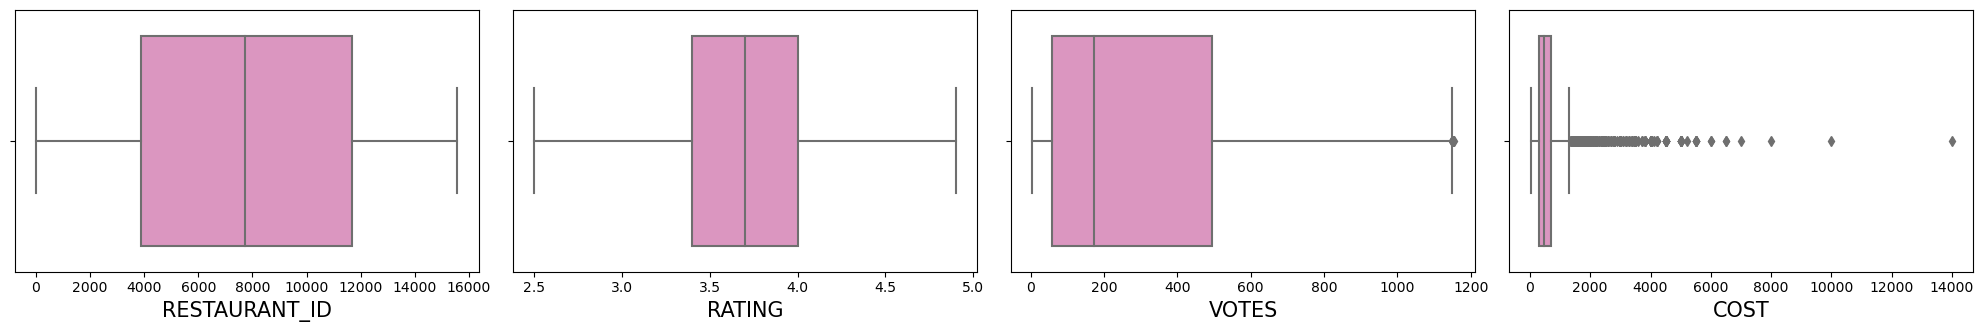

In [30]:
num_numerical_cols = len(numerical_col)
num_rows = 5  # Number of rows in the subplot grid
num_cols = 4  # Number of columns in the subplot grid
total_subplots = num_rows * num_cols

# Create a new figure and set its size
plt.figure(figsize=(20, 16), facecolor="white")  # Adjust the figure size as needed

# Iterate over numerical columns and create subplots for boxplots
plotnumber = 1
for col in numerical_col:
    if plotnumber <= total_subplots:
        # Create subplot at the specified position
        ax = plt.subplot(num_rows, num_cols, plotnumber)
        
        # Plot boxplot for the current column using seaborn
        sns.boxplot(x=df1[col], palette="Set2_r", ax=ax)
        
        # Customize subplot labels and ticks
        plt.xlabel(col, fontsize=15)
        plt.ylabel("")  # Clear y-axis label
        plt.xticks(rotation=0, fontsize=10)
        plt.yticks(fontsize=10)
        
        plotnumber += 1  # Increment plotnumber for the next subplot

# Adjust layout to prevent overlap and improve readability
plt.tight_layout()
plt.show()  # Display the figure with subplots

In [31]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

# Initialize Ordinal Encoder
OE = OrdinalEncoder()

mappings = {}

# Encoding categorical columns
for col in df1.columns:
    if df1[col].dtype == "object":
        original_values = df1[col].unique()
        df1[col] = OE.fit_transform(df1[[col]])
        encoded_values = OE.transform(original_values.reshape(-1, 1)).flatten()
        mappings[col] = dict(zip(original_values, encoded_values))

print("Encoded DataFrame:\n", df1)
print("\nMappings for each column:")
for col, mapping in mappings.items():
    print(f"{col} mapping:", mapping)

Encoded DataFrame:
        TITLE  RESTAURANT_ID   CITY  LOCALITY  RATING  VOTES  COST
0       31.0           9438  310.0     278.0     3.6   49.0  1200
1       33.0          13198   64.0    1022.0     4.2   30.0  1500
2       31.0          10915   64.0    1074.0     3.8  221.0   800
3       92.0           6346  217.0     133.0     4.1   24.0   800
4       49.0          15387  217.0     607.0     3.8  165.0   300
...      ...            ...    ...       ...     ...    ...   ...
12684   31.0           8324  247.0     709.0     3.8  492.0   550
12685   92.0          13228  127.0     334.0     3.8  546.0   500
12687   70.0          11133  234.0    1315.0     4.0  608.0  1300
12688   31.0           6134   64.0     618.0     3.5   32.0   400
12689   31.0           6430  127.0    1306.0     3.4  677.0   600

[11709 rows x 7 columns]

Mappings for each column:
TITLE mapping: {'CASUAL DINING': 31.0, 'CASUAL DINING,BAR': 33.0, 'QUICK BITES': 92.0, 'DESSERT PARLOR': 49.0, 'CAFÉ': 22.0, 'QUICK BIT

In [32]:
df1.describe()

,TITLE,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,COST
count,11709.000000,11709.000000,11709.000000,11709.000000,11709.000000,11709.000000,11709.000000
mean,59.212999,7755.362542,137.614826,642.317704,3.674925,269.882740,614.352293
std,31.605976,4489.616607,81.637522,392.892481,0.445113,260.235722,603.605530
min,0.000000,0.000000,0.000000,0.000000,2.500000,4.000000,20.000000
25%,31.000000,3884.000000,64.000000,329.000000,3.400000,58.000000,300.000000
50%,59.000000,7727.000000,127.000000,577.000000,3.700000,171.000000,450.000000
75%,92.000000,11665.000000,217.000000,986.000000,4.000000,494.000000,700.000000
max,109.000000,15573.000000,346.000000,1386.000000,4.900000,1154.000000,14000.000000


# Cheking how the data is ditributed in each columns

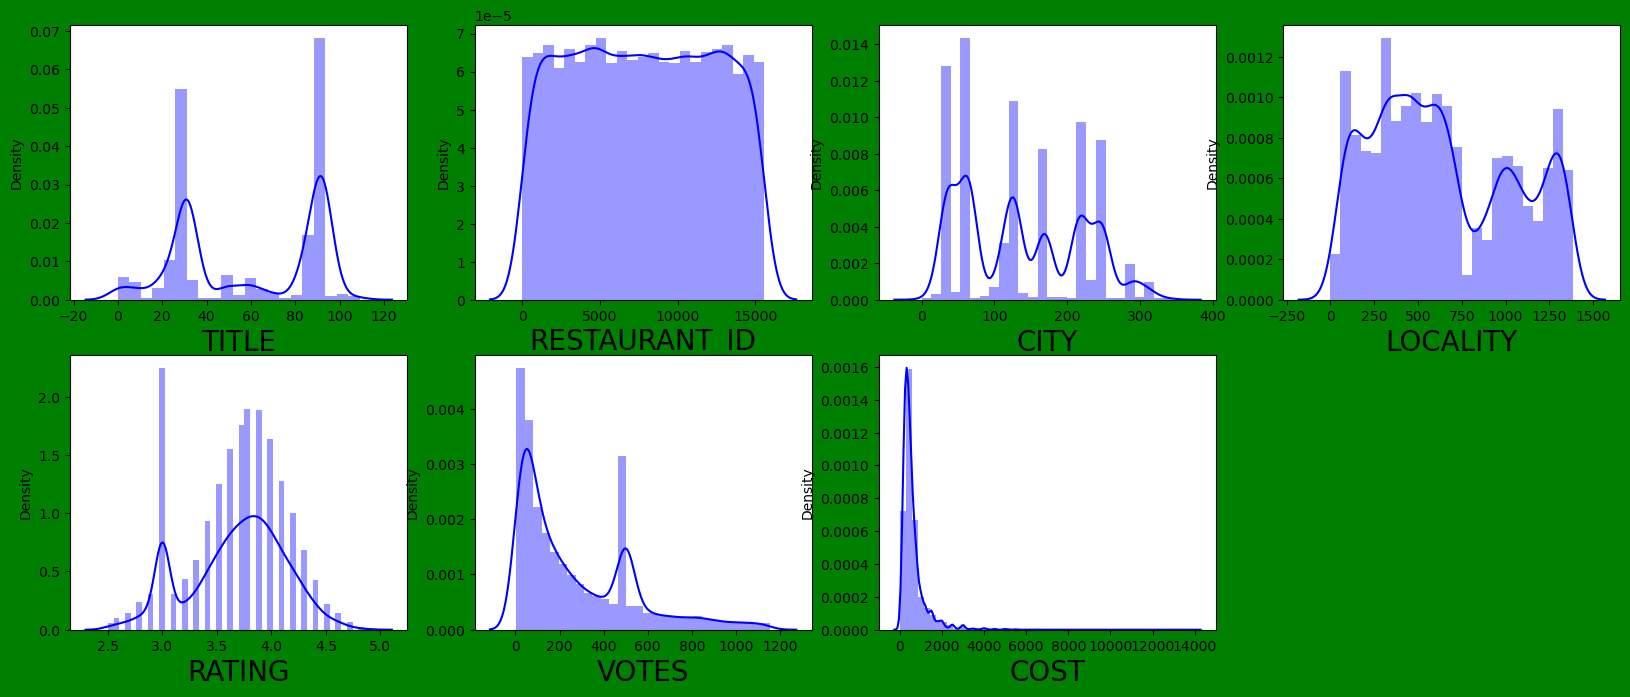

In [33]:
plt.figure(figsize=(20,25), facecolor = 'green')
plotnumber =1
for column in df1:
    if plotnumber <= 18:
        ax =plt.subplot(6,4,plotnumber)
        sns.distplot(df1[column],color = 'b')
        plt.xlabel(column,fontsize = 20)
    plotnumber += 1
plt.show()

# Cheking Skewness

In [34]:
# Now all data are converted into numercial form so no we check skewness
df1.skew()

TITLE           -0.157239
RESTAURANT_ID    0.008833
CITY             0.293156
LOCALITY         0.333593
RATING          -0.287094
VOTES            1.165099
COST             4.510271
dtype: float64

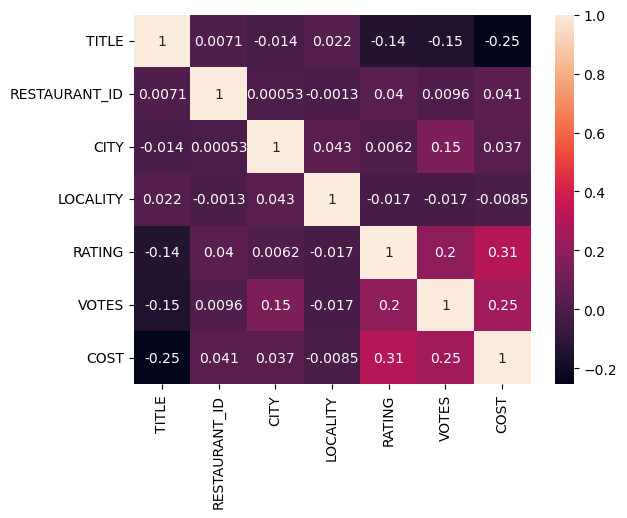

In [35]:
sns.heatmap(df1.corr(),annot=True)
plt.show()

In [36]:
# Removing Skewnees using cuberoot method
df['RATING'] = np.cbrt(df['RATING'])

# Separating Features and  Label

In [37]:
# Separating the independent and target varaible into x and y
x = df1.drop(['COST'], axis=1)  # Features we remove price columns
y = df1['COST']    #  Here now the price is my target variable
print("Feature Dimensions= ",x.shape)
print("Label Dimensions",y.shape)

Feature Dimensions=  (11709, 6)
Label Dimensions (11709,)


# Features scaling using standard scalirization

In [38]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Create a copy of the original DataFrame (for demonstration)
original_x = x.copy()

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the DataFrame 'x' using StandardScaler
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

# Perform some operations on the scaled data (for demonstration)
# Example: Multiply each feature by 2
x_scaled = x_scaled * 2


# 'x_restored' now contains the original values of 'x' before scaling
print("Original DataFrame (x):")
print(original_x)
print("\nDataFrame after scaling and operation (x_scaled):")
print(x_scaled)


Original DataFrame (x):
       TITLE  RESTAURANT_ID   CITY  LOCALITY  RATING  VOTES
0       31.0           9438  310.0     278.0     3.6   49.0
1       33.0          13198   64.0    1022.0     4.2   30.0
2       31.0          10915   64.0    1074.0     3.8  221.0
3       92.0           6346  217.0     133.0     4.1   24.0
4       49.0          15387  217.0     607.0     3.8  165.0
...      ...            ...    ...       ...     ...    ...
12684   31.0           8324  247.0     709.0     3.8  492.0
12685   92.0          13228  127.0     334.0     3.8  546.0
12687   70.0          11133  234.0    1315.0     4.0  608.0
12688   31.0           6134   64.0     618.0     3.5   32.0
12689   31.0           6430  127.0    1306.0     3.4  677.0

[11709 rows x 6 columns]

DataFrame after scaling and operation (x_scaled):
          TITLE  RESTAURANT_ID      CITY  LOCALITY    RATING     VOTES
0     -1.785371       0.749600  4.223365 -1.854621 -0.336671 -1.697631
1     -1.658808       2.424648 -1.803

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["Vif Values"] = [variance_inflation_factor(x_scaled.values,i)for i in range (len(x_scaled.columns))]
vif["Features"] = x_scaled.columns
vif

,Vif Values,Features
0,1.035237,TITLE
1,1.001751,RESTAURANT_ID
2,1.024482,CITY
3,1.002917,LOCALITY
4,1.057316,RATING
5,1.082236,VOTES


In [40]:
x_restored = pd.DataFrame(scaler.inverse_transform(x_scaled), columns=x.columns)
x

,TITLE,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES
0,31.0,9438,310.0,278.0,3.6,49.0
1,33.0,13198,64.0,1022.0,4.2,30.0
2,31.0,10915,64.0,1074.0,3.8,221.0
3,92.0,6346,217.0,133.0,4.1,24.0
4,49.0,15387,217.0,607.0,3.8,165.0
...,...,...,...,...,...,...
12684,31.0,8324,247.0,709.0,3.8,492.0
12685,92.0,13228,127.0,334.0,3.8,546.0
12687,70.0,11133,234.0,1315.0,4.0,608.0
12688,31.0,6134,64.0,618.0,3.5,32.0


# Import models

In [41]:
# importing libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor

# Find the best accuracy and random state

In [42]:
# Finding the best random state
maxAccu = 0
maxRS = 0
for i in range(1, 10):
    # Splitting the data into train and test sets using current random state (i)
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=i)
    
    # Initializing and training the RandomForestRegressor
    RFR = RandomForestRegressor()
    RFR.fit(x_train, y_train)
    pred = RFR.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Maximum r2 score is ",maxAccu,"on Random_State",maxRS)

Maximum r2 score is  0.7179731837976306 on Random_State 1


# Creating train test split

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=maxRS)

In [44]:
x_train

,TITLE,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES
809,31.0,15050,290.0,1294.0,3.0,421.0
9420,31.0,2521,234.0,1315.0,3.8,423.0
9950,92.0,15177,64.0,986.0,3.4,82.0
3208,31.0,520,127.0,203.0,3.6,238.0
8622,31.0,7607,247.0,1231.0,4.1,857.0
...,...,...,...,...,...,...
8478,31.0,6746,217.0,639.0,4.1,377.0
11867,31.0,10743,217.0,352.0,3.9,316.0
975,92.0,4094,64.0,543.0,3.4,32.0
5637,96.0,2565,157.0,547.0,3.2,4.0


In [45]:
y_train

809       650
9420     1000
9950      200
3208      400
8622      450
         ... 
8478      500
11867     600
975       200
5637      450
256       450
Name: COST, Length: 8196, dtype: int64

In [46]:
# Assuming x_test, y_test, x_train, y_train are your datasets
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

x_test shape: (3513, 6)
y_test shape: (3513,)
x_train shape: (8196, 6)
y_train shape: (8196,)


# Linear Regression

In [47]:
LR = LinearRegression()
LR.fit(x_train,y_train)
pred_LR = LR.predict(x_test)
pred_train= LR.predict(x_train)
print(LR)
print("R2_Score: ",r2_score(y_test,pred_LR))
print("R2_Score on training Data: ",r2_score(y_train,pred_train)*100)
print("Mean Absolute error:-",mean_absolute_error(y_test,pred_LR))
print("Mean Squared error:-",mean_squared_error(y_test,pred_LR))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_LR)))

LinearRegression()
R2_Score:  0.16880821034782567
R2_Score on training Data:  16.571756343604527
Mean Absolute error:- 312.7975759278926
Mean Squared error:- 292217.04913421936
Root Mean Squared Error:- 540.5710398589804


# RandomForestRegressor

In [48]:
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR = RFR.predict(x_test)
pred_train= RFR.predict(x_train)

print("R2_Score: ",r2_score(y_test,pred_RFR))
print("R2_Score on training Data: ",r2_score(y_train,pred_train)*100)
print("Mean Absolute error:-",mean_absolute_error(y_test,pred_RFR))
print("Mean Squared error:-",mean_squared_error(y_test,pred_RFR))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2_Score:  0.7172829744580536
R2_Score on training Data:  95.61754246596273
Mean Absolute error:- 189.5971591232565
Mean Squared error:- 99393.10755035582
Root Mean Squared Error:- 315.2667244578086


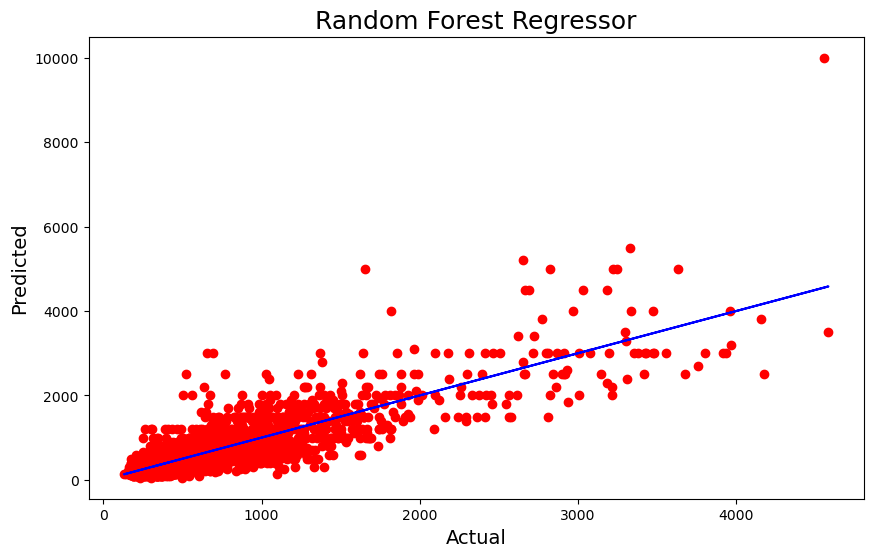

In [49]:
#Plotting
plt.figure(figsize = (10,6))
plt.scatter(x= pred_RFR,y=y_test,color="r")
plt.plot(pred_RFR,pred_RFR,color = "b")
plt.xlabel("Actual",fontsize = 14)
plt.ylabel("Predicted",fontsize= 14)
plt.title("Random Forest Regressor",fontsize = 18 )
plt.show()

# KNN

In [50]:
knn = KNN()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
pred_train= knn.predict(x_train)

print("R2_Score: ",r2_score(y_test,pred_knn))
print("R2_Score on training Data: ",r2_score(y_train,pred_train)*100)
print("Mean Absolute error:-",mean_absolute_error(y_test,pred_knn))
print("Mean Squared error:-",mean_squared_error(y_test,pred_knn))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_knn)))

R2_Score:  -0.0702663227544087
R2_Score on training Data:  29.380217206357795
Mean Absolute error:- 371.62152006831764
Mean Squared error:- 376267.03068602335
Root Mean Squared Error:- 613.4060895410342


# GradientBoostingRegressor

In [51]:
GBR = GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR = GBR.predict(x_test)
pred_train= GBR.predict(x_train)

print("R2_Score: ",r2_score(y_test,pred_GBR))
print("R2_Score on training Data: ",r2_score(y_train,pred_train)*100)
print("Mean Absolute error:-",mean_absolute_error(y_test,pred_GBR))
print("Mean Squared error:-",mean_squared_error(y_test,pred_GBR))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2_Score:  0.6859219542993881
R2_Score on training Data:  70.48798711246779
Mean Absolute error:- 197.0609762836753
Mean Squared error:- 110418.51093221422
Root Mean Squared Error:- 332.29280902874535


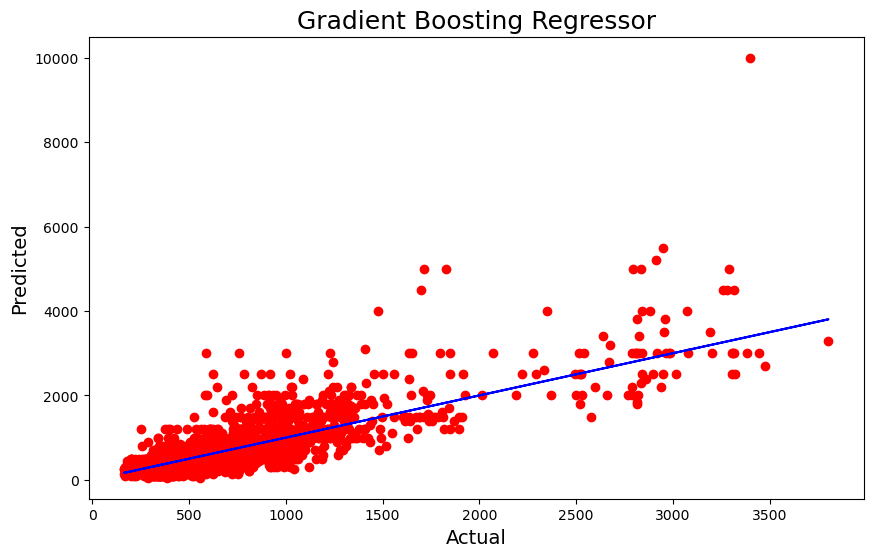

In [52]:
#Plotting
plt.figure(figsize = (10,6))
plt.scatter(x= pred_GBR,y=y_test,color="r")
plt.plot(pred_GBR,pred_GBR,color = "b")
plt.xlabel("Actual",fontsize = 14)
plt.ylabel("Predicted",fontsize= 14)
plt.title("Gradient Boosting Regressor",fontsize = 18 )
plt.show()

# DecisionTreeRegressor

In [53]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr = dtr.predict(x_test)
pred_train = dtr.predict(x_train)

print("R2_Score: ",r2_score(y_test,pred_dtr))
print("R2_Score on training Data: ",r2_score(y_train,pred_train)*100)
print("Mean Absolute error:-",mean_absolute_error(y_test,pred_dtr))
print("Mean Squared error:-",mean_squared_error(y_test,pred_dtr))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_dtr)))


R2_Score:  0.5257639661215384
R2_Score on training Data:  100.0
Mean Absolute error:- 249.8551095929405
Mean Squared error:- 166724.28209507544
Root Mean Squared Error:- 408.3188485669936


# SVR

In [54]:
svr = SVR()
svr.fit(x_train,y_train)
pred_svr = svr.predict(x_test)
pred_train = svr.predict(x_train)

print("R2_Score: ",r2_score(y_test,pred_svr))
print("R2_Score on training Data: ",r2_score(y_train,pred_train)*100)
print("Mean Absolute error:-",mean_absolute_error(y_test,pred_svr))
print("Mean Squared error:-",mean_squared_error(y_test,pred_svr))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_svr)))

R2_Score:  -0.08280241298747582
R2_Score on training Data:  -8.256240882486221
Mean Absolute error:- 326.58218150926854
Mean Squared error:- 380674.2677896527
Root Mean Squared Error:- 616.9880613023664


# Lasso

In [55]:
lasso = Lasso()
lasso.fit(x_train,y_train)
pred_lasso = lasso.predict(x_test)
pred_train = lasso.predict(x_train)

print("R2_Score: ",r2_score(y_test,pred_lasso))
print("R2_Score on training Data: ",r2_score(y_train,pred_train)*100)
print("Mean Absolute error:-",mean_absolute_error(y_test,pred_lasso))
print("Mean Squared error:-",mean_squared_error(y_test,pred_lasso))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_lasso)))

R2_Score:  0.16896177263646261
R2_Score on training Data:  16.57031398228751
Mean Absolute error:- 312.412241370056
Mean Squared error:- 292163.06217308424
Root Mean Squared Error:- 540.5211024308711


# Ridge

In [56]:
rd = Ridge()
rd.fit(x_train,y_train)
pred_ridge = rd.predict(x_test)
pred_train = rd.predict(x_train)

print("R2_Score: ",r2_score(y_test,pred_ridge))
print("R2_Score on training Data: ",r2_score(y_train,pred_train)*100)
print("Mean Absolute error:-",mean_absolute_error(y_test,pred_ridge))
print("Mean Squared error:-",mean_squared_error(y_test,pred_ridge))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_ridge)))

R2_Score:  0.16881522298030016
R2_Score on training Data:  16.571753866291573
Mean Absolute error:- 312.78126345258
Mean Squared error:- 292214.5837456124
Root Mean Squared Error:- 540.5687594983754


# ExtraTreesRegressor

In [57]:
etr = ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr = etr.predict(x_test)
pred_train = etr.predict(x_train)

print("R2_Score: ",r2_score(y_test,pred_etr))
print("R2_Score on training Data: ",r2_score(y_train,pred_train)*100)
print("Mean Absolute error:-",mean_absolute_error(y_test,pred_etr))
print("Mean Squared error:-",mean_squared_error(y_test,pred_etr))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_etr)))

R2_Score:  0.6801477149451463
R2_Score on training Data:  99.99748378597043
Mean Absolute error:- 203.27545972103613
Mean Squared error:- 112448.5251913749
Root Mean Squared Error:- 335.33345373131937


# Final model is Random forest regressor

In [58]:
RFR.fit(x_train,y_train)
pred = RFR.predict(x_test)
print("R2_Score: ",r2_score(y_test,pred))
print("R2_Score on training Data: ",r2_score(y_train,pred_train)*100)
print("Mean Absolute error:-",mean_absolute_error(y_test,pred))
print("Mean Squared error:-",mean_squared_error(y_test,pred))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred)))

R2_Score:  0.7167204994597094
R2_Score on training Data:  99.99748378597043
Mean Absolute error:- 189.36736976942785
Mean Squared error:- 99590.85346925705
Root Mean Squared Error:- 315.58018548263937


# Saving the model using joblib

In [59]:
# Saving the model
import joblib
joblib.dump(RFR,"Restaurant_food.pkl")

['Restaurant_food.pkl']

In [60]:
import pickle
filename = "Restaurant_food.pkl"
pickle.dump(RFR, open(filename,'wb'))  #Saved model

# Predicted the saved model

In [61]:
load_model = pickle.load(open("Restaurant_food.pkl",'rb'))
result = load_model.score(x_test,y_test)
print(result*100)

71.67204994597094


# Conclusion

In [62]:
conclusion = pd.DataFrame([load_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,3503,3504,3505,3506,3507,3508,3509,3510,3511,3512
Predicted,339.5,735.0,532.5,357.0,402.5,856.0,274.0,302.0,427.5,330.5,...,1098.0,221.4,465.5,1754.0,532.0,489.0,485.0,764.5,186.1,436.0
Original,400.0,700.0,900.0,200.0,200.0,600.0,150.0,300.0,200.0,300.0,...,700.0,300.0,300.0,1600.0,500.0,500.0,450.0,600.0,300.0,300.0


# Predicted the restaurant food price

In [64]:
import numpy as np

# Define the mapping dictionary
title_mapping={'CASUAL DINING': 31.0, 'CASUAL DINING,BAR': 33.0, 'QUICK BITES': 92.0, 'DESSERT PARLOR': 49.0, 'CAFÉ': 22.0, 'QUICK BITES,BEVERAGE SHOP': 95.0, 'BAKERY,QUICK BITES': 6.0, 'BAR,CASUAL DINING': 10.0, 'BAR': 8.0, 'BEVERAGE SHOP': 16.0, 'FINE DINING': 59.0, 'CAFÉ,QUICK BITES': 30.0, 'BEVERAGE SHOP,DESSERT PARLOR': 19.0, 'None': 85.0, 'SWEET SHOP,QUICK BITES': 109.0, 'DESSERT PARLOR,SWEET SHOP': 57.0, 'BAKERY': 0.0, 'BAKERY,DESSERT PARLOR': 4.0, 'FOOD COURT': 63.0, 'LOUNGE': 70.0, 'DESSERT PARLOR,BEVERAGE SHOP': 51.0, 'FOOD TRUCK': 66.0, 'QUICK BITES,FOOD COURT': 99.0, 'SWEET SHOP': 103.0, 'BEVERAGE SHOP,FOOD COURT': 20.0, 'PUB,CASUAL DINING': 89.0, 'MESS': 80.0, 'MICROBREWERY,CASUAL DINING': 83.0, 'CASUAL DINING,SWEET SHOP': 41.0, 'KIOSK': 67.0, 'QUICK BITES,KIOSK': 101.0, 'CLUB': 42.0, 'FINE DINING,BAR': 60.0, 'DESSERT PARLOR,QUICK BITES': 56.0, 'FOOD COURT,QUICK BITES': 65.0, 'BAKERY,CONFECTIONERY': 3.0, 'CASUAL DINING,CAFÉ': 34.0, 'DHABA': 58.0, 'BAR,LOUNGE': 13.0, 'CAFÉ,DESSERT PARLOR': 27.0, 'QUICK BITES,DESSERT PARLOR': 98.0, 'LOUNGE,BAR': 71.0, 'MICROBREWERY': 81.0, 'SWEET SHOP,CONFECTIONERY': 107.0, 'PUB': 87.0, 'CAFÉ,BAR': 24.0, 'DESSERT PARLOR,BAKERY': 50.0, 'QUICK BITES,SWEET SHOP': 102.0, 'BEVERAGE SHOP,QUICK BITES': 21.0, 'CASUAL DINING,CLUB': 35.0, 'QUICK BITES,CAFÉ': 96.0, 'BAR,CAFÉ': 9.0, 'QUICK BITES,CASUAL DINING': 97.0, 'CASUAL DINING,MICROBREWERY': 39.0, 'CASUAL DINING,BAKERY': 32.0, 'CAFÉ,BAKERY': 23.0, 'MEAT SHOP': 78.0, 'QUICK BITES,BAKERY': 93.0, 'LOUNGE,CASUAL DINING': 73.0, 'CAFÉ,CASUAL DINING': 26.0, 'DESSERT PARLOR,CAFÉ': 52.0, 'SWEET SHOP,CASUAL DINING': 106.0, 'MEAT SHOP,QUICK BITES': 79.0, 'PUB,LOUNGE': 90.0, 'CASUAL DINING,PUB': 40.0, 'BAKERY,CAFÉ': 2.0, 'FINE DINING,LOUNGE': 62.0, 'CONFECTIONERY': 47.0, 'QUICK BITES,BAR': 94.0, 'BAKERY,FOOD COURT': 5.0, 'DESSERT PARLOR,FOOD COURT': 53.0, 'BAR,FINE DINING': 12.0, 'QUICK BITES,FOOD TRUCK': 100.0, 'COCKTAIL BAR': 45.0, 'BAKERY,BEVERAGE SHOP': 1.0, 'CASUAL DINING,LOUNGE': 38.0, 'PUB,BAR': 88.0, 'BAKERY,SWEET SHOP': 7.0, 'SWEET SHOP,BAKERY': 104.0, 'PUB,MICROBREWERY': 91.0, 'CASUAL DINING,FOOD COURT': 37.0, 'PAAN SHOP': 86.0, 'BEVERAGE SHOP,CAFÉ': 17.0, 'FOOD COURT,DESSERT PARLOR': 64.0, 'CLUB,MICROBREWERY': 44.0, 'CAFÉ,BEVERAGE SHOP': 25.0, 'DESSERT PARLOR,PAAN SHOP': 55.0, 'LOUNGE,CLUB': 74.0, 'SWEET SHOP,DESSERT PARLOR': 108.0, 'BAR,PUB': 15.0, 'CONFECTIONERY,QUICK BITES': 48.0, 'DESSERT PARLOR,KIOSK': 54.0, 'LOUNGE,PUB': 77.0, 'SWEET SHOP,BEVERAGE SHOP': 105.0, 'FINE DINING,CAFÉ': 61.0, 'BEVERAGE SHOP,CASUAL DINING': 18.0, 'KIOSK,QUICK BITES': 69.0, 'CASUAL DINING,DESSERT PARLOR': 36.0, 'LOUNGE,FINE DINING': 75.0, 'MICROBREWERY,BAR': 82.0, 'CAFÉ,LOUNGE': 29.0, 'BAR,CLUB': 11.0, 'COCKTAIL BAR,CASUAL DINING': 46.0, 'MICROBREWERY,PUB': 84.0, 'CAFÉ,FINE DINING': 28.0, 'KIOSK,FOOD COURT': 68.0, 'LOUNGE,CAFÉ': 72.0, 'LOUNGE,MICROBREWERY': 76.0, 'CLUB,BAR': 43.0, 'BAR,MICROBREWERY': 14.0}
    
city_mapping={'Thane': 310.0, 'Chennai': 64.0, 'Mumbai': 217.0, 'Bangalore': 36.0, 'Hyderabad': 127.0, 'Kochi': 169.0, 'Thane West': 312.0, 'Andheri Lokhandwala': 14.0, 'New Delhi': 247.0, 'Gurgaon': 116.0, 'Malad East': 203.0, 'Andheri West': 16.0, '682036': 7.0, 'Bangalor': 35.0, 'Navi Mumbai': 234.0, 'Bandra West': 34.0, 'Delhi': 86.0, 'Noida': 252.0, 'Bangalore-560066': 43.0, 'Secunderabad': 290.0, 'India': 134.0, 'Madhuranagar': 196.0, 'Chennai Teynampet': 75.0, 'Faridabad': 102.0, 'Chembur.': 62.0, 'Maharashtra': 200.0, 'opp gurudwara Shakurpur': 343.0, 'Telagana Land Line:040-48507016': 302.0, 'Ghaziabad': 110.0, 'Karnataka': 151.0, 'Kerala': 157.0, 'Edappally': 98.0, 'Kadavanthra': 142.0, 'Ernakulam Circle kochi': 101.0, 'Bengalore': 50.0, 'Near Reliance Fresh': 242.0, 'Kilpauk': 168.0, 'Bengaluru': 51.0, 'Kothaguda': 185.0, 'Goregaon West': 112.0, 'Banglore': 46.0, 'Tamil Nadu': 301.0, 'Kakkanad': 144.0, 'Kochi Elamkulam': 172.0, 'Outer Ring Road': 259.0, 'Mulund East': 215.0, 'Secunderabad main road near signal NMREC COLLEGE': 292.0, 'Telangana': 303.0, 'Ponnuruni Kochi': 272.0, 'Gachibowli': 107.0, 'Semmancheri': 295.0, '5th Main Teachers Colony Koramangala Block 1 Bangalore 560034': 4.0, 'Mumbai Mahim': 224.0, 'Powai (Next to Powai Plaza)': 275.0, 'Dombivali East': 92.0, 'Kochi Vyttila': 177.0, 'Kandivali': 150.0, 'Kochi Palarivattom': 175.0, 'Dewan Rama Road': 89.0, 'Gurugram': 119.0, 'Kaloor': 146.0, 'Besant Nagar': 52.0, 'Arumbakkam chennai-600106.': 21.0, 'Adjacent To Commercial Street': 8.0, 'Delhi NCR': 88.0, 'Dwarka': 93.0, '682035': 6.0, 'Kalyan West': 148.0, 'Avadi': 24.0, 'Kondapur': 183.0, 'Mehdipatnam': 209.0, 'Gandipet': 109.0, 'Velachery': 327.0, 'Pallavaram': 262.0, 'Vijaya Nagar': 329.0, 'BTM Layout': 30.0, 'Chennai 600034.': 68.0, 'Metro Pillar No 21. Mettuguda main road near railway degree college.': 210.0, 'Chennai - 600040': 67.0, 'JP Nagar Bangalore': 138.0, 'Madhapur': 195.0, 'Ernakulam': 100.0, 'Sarjapur': 285.0, 'Whitefield Bangalore': 335.0, 'Kochi Chullickal': 171.0, 'Kochi-683101': 180.0, 'Bangalore - 560076': 37.0, 'Rohini': 283.0, 'Hyderabad Behind Vacs Pastries': 128.0, 'Hyderabad neerus emporium.': 130.0, 'Navi Mumbai.': 235.0, 'Karol Bagh': 156.0, 'Perungudi': 268.0, 'Thykoodam': 316.0, 'Greater Noida': 115.0, 'Bangalore.': 44.0, 'Khairatabad': 165.0, 'chullickal': 338.0, 'Grant Road West': 113.0, 'Hitech City': 125.0, 'West Maredpally': 333.0, 'Mumbai - 400007': 218.0, 'Chennai Padur': 73.0, 'Chander Nagar New Delhi': 61.0, 'Nedumbassery': 246.0, 'MG Road': 193.0, 'Naya Nagar Mira Road': 237.0, 'Pitampura': 270.0, 'Lower Parel': 190.0, 'HBR Layout': 120.0, 'Telangana 500003': 304.0, 'Rajiv gandhi Nagar': 278.0, 'New Delhi.': 250.0, 'Medavakkam': 208.0, 'Sathya Nagar': 286.0, 'p.o Kochi': 345.0, 'Behind Ramalayam Temple': 49.0, 'Palarivattom': 260.0, 'Brigade Road': 58.0, 'Mumbai.': 226.0, 'Mumbai Andheri East': 221.0, 'Virar West': 330.0, 'B-1 Stage': 25.0, 'Chennai Kovalam': 70.0, 'Hyderabad.': 132.0, 'Aluva': 9.0, 'Telangana 500034': 306.0, 'IOB Bank Kamala Nagar': 133.0, 'HSR Layout': 121.0, 'Marine Drive': 206.0, 'DLF Galleria': 85.0, 'Nallathambi Main Road': 230.0, 'Chennai opp: Vasanth & co': 78.0, 'Citypark': 84.0, 'Karnataka 560103': 155.0, 'Bhayandar': 53.0, 'Aluva Circle': 10.0, 'Thammenahalli Village': 309.0, 'SG Palya': 284.0, 'Attapur.': 23.0, 'Near Shangrilla Bus Stop': 245.0, 'Khar (west)': 166.0, 'Road 3': 281.0, 'Kukatpally': 187.0, 'Faridabd': 103.0, 'Telangana 500032': 305.0, 'Dilsukhnagar': 90.0, 'Mogappair. Chennai': 214.0, 'Near Munrshwara Temple': 240.0, 'Off Brigade Road': 255.0, 'khar west': 340.0, 'Potheri': 273.0, 'Chennai Perungudi': 74.0, 'Chennai Thuraipakkam': 77.0, 'OMR Karapakkam': 254.0, 'Hyderabad-500032': 131.0, 'Mumbai Dombivali East': 223.0, 'Chennai Thousand Lights': 76.0, 'Mahim': 202.0, 'Lingampally': 189.0, 'Powai': 274.0, 'New Delhi-110024': 249.0, 'Chennai- 600107': 79.0, 'Kerala 683104': 162.0, 'Vasai West.': 325.0, 'Near Santosh Banjara Hyderabad': 243.0, 'Banaswadi (Next to Indian Bank) Bangalore': 32.0, 'BTM Bangalore': 29.0, 'Greater Kailash 2 New Delhi': 114.0, 'Secunderabad ECIL': 291.0, 'Bangalore Koramangala 7th Block': 40.0, 'bangalore : 560085': 337.0, 'navi mumbai': 342.0, 'Gachibowli Hyderabad': 108.0, 'CPR layout harlur main road opposite to ozone ever green apartment Bangalore -': 59.0, 'ECR NEELANKARAI Chennai 600115': 95.0, 'ward X11': 346.0, 'kochi': 341.0, 'Perumbavoor': 267.0, 'Mira raod east': 212.0, 'Kerala 682013': 159.0, 'Chennai.': 81.0, 'Pokhran Road 2': 271.0, 'Uttar Pradesh': 321.0, 'Karnataka 560102': 154.0, 'Mumbai - 400013': 219.0, 'Naharpar': 228.0, 'Hosur Road': 126.0, 'Near Bharat Petroleum.': 238.0, 'Chennai (Bang Opposite Indian Bank)': 65.0, 'Sriram nagar': 298.0, 'West Mumbai': 334.0, 'Vyttila': 331.0, 'Banjara Hills': 47.0, 'MALAPALLIPURAM P .O THRISSUR': 192.0, 'Andheri west Mumbai': 17.0, 'Karnataka 560043': 153.0, 'Panampilly Nagar': 265.0, 'hyderabad': 339.0, 'Borivali East.': 55.0, 'ECIL': 94.0, 'Jubilee Hills': 141.0, 'Amrit kaur market opposite new delhi railway station paharganj': 12.0, 'Chennai Opposite 5C Bus stand': 72.0, 'Kochi Ravipuram': 176.0, 'Rajanpada': 276.0, 'Mahabalipuram': 197.0, 'Secunderabad. WE HAVE NO BRANCHES.': 294.0, 'Telangana 500081': 308.0, 'Gurgoan': 118.0, 'Elamakkara': 99.0, 'Sector 1': 287.0, 'Bandra W': 33.0, 'Kolathur': 182.0, 'Chennai Mahabalipuram': 71.0, '3rd Street': 3.0, 'Mumbai Chakala': 222.0, 'Borivali West': 56.0, 'Rodeo Drive Sector 49': 282.0, 'Pallimukku': 263.0, 'Delhi 110085': 87.0, 'Sector 51': 288.0, 'Champapet': 60.0, 'Andavar Nagar': 13.0, 'Bangalore - 560103': 38.0, 'Kerala 690525': 164.0, 'opp mukteshwar ashram powai': 344.0, 'Nungambakkam': 253.0, 'BK Guda': 27.0, 'Jogeshwari (w) Mumbai': 140.0, 'Kukatapally': 186.0, 'Near Sector 110 Noida': 244.0, 'Navallur': 233.0, 'Mumbai - 80': 220.0, 'Begumpet': 48.0, 'Maharaja Hotel Beside Gardania Bar': 199.0, 'Ashok Vihar Phase 1': 22.0, 'Trivandrum': 318.0, 'Kochi-18': 179.0, 'Narayanguda': 232.0, 'Thevera': 314.0, 'Chennai-40': 80.0, 'Palm Beach Road': 264.0, 'East Coast Road (ECR)': 96.0, 'Ramapuram': 280.0, 'Chennai Chrompet': 69.0, 'Nandanam': 231.0, 'MG Road Ernakulam': 194.0, 'Andheri Lokhandwala.': 15.0, 'Indiranagar': 135.0, 'Thiruvanmiyur': 315.0, 'Ambattur': 11.0, 'Banglaore': 45.0, 'Chennai - 34 Landmark - Near Loyola College': 66.0, 'Anna Nagar West': 19.0, 'Old Railway Road': 257.0, 'East Mumbai': 97.0, 'Kanakapura Road Banglore': 149.0, 'Kochi Kakkanad': 174.0, 'Kalyan': 147.0, 'Near Ramlila Ground': 241.0, 'Serilingampally': 296.0, 'Himayath Nagar': 124.0, 'Nallala Street': 229.0, 'Anna Salai': 20.0, 'Old Delhi': 256.0, 'Wagle Estate': 332.0, '1st Stage': 1.0, 'Kochi-16': 178.0, 'Kochi International Airport VIP Road': 173.0, 'First Street': 104.0, 'Chenn ai': 63.0, '6 & 7 - 4/64 Subhash Nagar': 5.0, '1st Tavarekere': 2.0, 'Perambur': 266.0, 'Vaishali Ghaziabad': 324.0, 'Thanisandra': 313.0, 'Block F': 54.0, 'Sector 7 Dwarka': 289.0, 'Opposite Barathi Gas Company': 258.0, 'Vadapalani': 322.0, 'Kondapur.': 184.0, 'Badlapur West.': 31.0, 'Kalamassery': 145.0, 'Palavakkam': 261.0, 'TCS Synergy park': 299.0, 'BTM 1st Stage': 28.0, 'Mahadevpura': 198.0, 'NEW BEL ROAD 560054': 227.0, 'Veliaveetil house Vivekananda Nagar Elamakkara': 328.0, 'Sholinganallur': 297.0, 'Maharashtra 400102': 201.0, 'Lower Parel West': 191.0, 'Tripunithura': 317.0, 'Mogappair': 213.0, 'Telangana 500070': 307.0, 'JP Nagar': 137.0, 'Navi-Mumbai': 236.0, 'Marathahalli': 205.0, 'Haridwar Apartments': 122.0, 'Kerala 682001 India': 158.0, 'Karnataka 560037': 152.0, 'Kerala 683585': 163.0, 'Chennai. (Near Hotel Matshya)': 82.0, 'Indirapuram': 136.0, 'Manikonda': 204.0, 'Bangalore land mark above mahaveer hard ware': 42.0, 'Kerala 682304': 161.0, 'Rajarajeshwari Nagar bangalore': 277.0, 'GST Road': 106.0, 'Fort Kochi': 105.0, 'Lahari Apartments': 188.0, 'Ramanthapur': 279.0, 'Mulund west': 216.0, 'Gurgaon Haryana India': 117.0, 'New Delhi..Near by SBI bank': 251.0, 'Kochi Aluva 102': 170.0, 'Phase 1 Bangalore': 269.0, 'Hyderabad Manikonda': 129.0, 'Mumbai This is a Delivery & Take-away Restaurant only.': 225.0, '10th avenue': 0.0, 'Uppal': 320.0, 'New Delhi 110075': 248.0, 'Ulsoo': 319.0, 'Bangalore 560076': 39.0, 'Chromepet': 83.0, 'Kerala 682024': 160.0, 'Janakpuri': 139.0, 'Secunderabad.': 293.0, 'B.B.M.P East (Karnataka) - 560049': 26.0, 'Tambaram': 300.0, 'Vadapalani.': 323.0, 'Dist. Center New Delhi': 91.0, 'Bangalore Road': 41.0, 'aluva circle': 336.0, 'Kochi.': 181.0, 'Thane Mumbai': 311.0, 'Kadubesanahalli Bangalore': 143.0, 'Vasai west': 326.0, 'Mig Housing Society': 211.0, 'Haryana': 123.0, 'Borivali West.': 57.0, 'Golf Course Road': 111.0, 'Khar Mumbai': 167.0, 'Near Jyothinivas College': 239.0, 'Anna Nagar East': 18.0, 'Masab Tank': 207.0}

locality_mapping={'Dombivali East': 278.0, 'Ramapuram': 1022.0, 'Saligramam': 1074.0, 'Bandra West': 133.0, 'Lower Parel': 607.0, 'Vile Parle West': 1333.0, 'Koramangala 6th Block': 563.0, 'Bannerghatta Road': 139.0, 'Dilsukhnagar': 275.0, 'Koramangala 5th Block': 561.0, 'Indiranagar': 420.0, 'Chullickal': 234.0, 'Edappally': 301.0, 'Majiwada': 635.0, 'Borivali West': 183.0, 'Nagole': 734.0, 'Andheri Lokhandwala': 86.0, 'Krishna Nagar': 577.0, 'Hitech City': 404.0, 'Thippasandra': 1268.0, 'Dwarka': 286.0, 'Kakkanad': 473.0, 'HSR': 388.0, 'Vadapalani': 1302.0, 'Neelangarai': 847.0, 'Korattur': 566.0, 'DLF Cyber City': 253.0, 'Palarivattom': 944.0, 'Besant Nagar': 159.0, 'International Airport': 429.0, 'Sholinganallur': 1200.0, 'MG Road': 610.0, 'Nungambakkam': 873.0, 'KR Puram': 464.0, 'Kondapur': 554.0, 'Ulsoor': 1292.0, 'Kaloor': 480.0, 'Begum Bazaar': 145.0, 'Sector 15': 1109.0, 'Film City Road': 326.0, 'Whitefield': 1358.0, 'Chittoor Road': 226.0, 'Rajajinagar': 1013.0, 'Banaswadi': 128.0, 'Panampilly Nagar': 952.0, 'Rajinder Nagar': 1017.0, 'Tarnaka': 1250.0, 'Kerala': 520.0, 'T. Nagar': 1240.0, 'Jalahalli': 438.0, 'Greater Kailash (GK) 2': 363.0, 'Kalamassery': 475.0, 'Kengeri': 519.0, 'Mazgaon': 682.0, 'Triplicane': 1285.0, 'BTM': 115.0, 'Mattancherry': 673.0, 'Kalkaji': 479.0, 'Rohini': 1043.0, 'Kurla Complex': 585.0, 'Satyaniketan': 1093.0, 'Gachibowli': 334.0, 'Electronic City': 313.0, 'Bhayandar': 172.0, 'Nerul': 850.0, 'City Market': 237.0, 'Pali Hill': 947.0, 'East of Kailash': 296.0, 'Sector 29': 1126.0, 'Vijay Nagar': 1328.0, 'Uttam Nagar': 1298.0, 'Near Elamkulam': 771.0, 'Koramangala 3rd Block': 559.0, 'New BEL Road': 855.0, 'Kacheguda': 465.0, 'Near Andheri West Station': 757.0, 'Delhi University-GTB Nagar': 270.0, 'Lingampally': 601.0, 'Nanganallur': 744.0, 'Church Street': 235.0, 'Koramangala 1st Block': 557.0, 'Anna Nagar East': 91.0, 'Poonamalle': 984.0, 'Purasaiwalkam': 999.0, 'Marine Drive': 662.0, 'Kalyan Nagar': 485.0, 'Kodambakkam': 550.0, 'Sohna Road': 1210.0, 'LIngampally': 588.0, 'JP Nagar': 435.0, 'Sector 53': 1145.0, 'Kandivali West': 497.0, 'Uppal': 1294.0, 'Vasai': 1310.0, 'Jogeshwari': 451.0, 'Elamkulam': 312.0, 'Kammanahalli': 490.0, 'Kandivali East': 496.0, 'Shastri Nagar - Lokhandwala': 1194.0, 'Kothapet': 570.0, 'JNU': 434.0, 'Telangana 500084': 1255.0, 'Banashankari': 126.0, 'Shahdara': 1183.0, 'Greater Kailash 2 (GK 2)': 366.0, 'Nizampet': 865.0, 'Marol Mumbai': 666.0, 'Potheri': 986.0, 'Breach Candy': 187.0, '4 Bungalows': 24.0, 'Rajouri Garden': 1019.0, 'Behind Allahabad Bank': 148.0, 'Teynampet': 1258.0, 'Madhapur': 615.0, 'Rajarajeshwari Nagar': 1014.0, 'Near Andheri East Station': 756.0, 'S D Road': 1048.0, 'Mehdipatnam': 688.0, 'Vyttila': 1342.0, 'Saroor Nagar': 1089.0, 'Juhu': 457.0, 'Manikonda': 655.0, 'Punjabi Bagh': 996.0, 'K.K. Nagar': 461.0, 'Thousand Lights': 1274.0, 'Aluva': 70.0, 'Malad West': 639.0, 'Nallakunta': 739.0, 'Jeevan Bhima Nagar': 448.0, 'Vasant Kunj': 1312.0, 'Fort': 328.0, 'Fort Kochi': 329.0, 'Mira Road': 693.0, 'Jayanagar': 445.0, 'Abids': 51.0, 'Vennala': 1324.0, 'Lakdikapul': 594.0, 'Panjagutta': 957.0, 'Basaveshwara Nagar': 143.0, 'Kukatpally': 578.0, 'LB Nagar': 587.0, 'Arumbakkam': 98.0, 'Habsiguda': 390.0, 'Andheri West': 87.0, 'Marathahalli': 661.0, 'Girgaum': 352.0, 'Karapakkam': 501.0, 'Himayath Nagar': 400.0, 'Railway Station Road': 1010.0, 'Sahakara Nagar': 1062.0, 'DLF Phase 4': 257.0, 'Lodhi Road': 605.0, 'Bandra East': 129.0, 'Sainik Farms': 1068.0, 'Ambernath': 77.0, 'Tilak Nagar': 1279.0, 'Aerocity': 60.0, 'Ashok Nagar': 99.0, 'Adyar': 59.0, 'Semmancheri': 1178.0, 'Vikaspuri': 1330.0, 'Kanchipuram District': 494.0, 'CBD-Belapur': 192.0, 'Sector 63': 1152.0, 'Mysore Road': 727.0, 'Toli Chowki': 1282.0, 'Near Marine Drive': 789.0, 'Perungudi': 974.0, 'Gopalapuram': 357.0, 'Dadar West': 261.0, 'Navallur': 750.0, 'East Patel Nagar': 293.0, 'Adikmet': 57.0, 'Sector 125': 1102.0, 'Palarivattom Kochi': 945.0, 'Begumpet': 146.0, 'Virugambakkam': 1338.0, 'Kompally': 553.0, 'Wilson Garden': 1360.0, 'Pallavaram': 948.0, 'Azad Nagar': 110.0, 'Ashok Vihar Phase 4': 104.0, 'Thane West': 1262.0, 'DLF Phase 3': 256.0, 'Doddathoguru Electronic City': 277.0, 'GST Road': 332.0, 'BTM 1 Stage BTM': 116.0, 'Mumbai': 716.0, 'Vile Parle East': 1332.0, 'Green Park': 370.0, 'Chengalpattu': 212.0, 'Near Jeevan Jyoti Apartment': 778.0, 'WZ- 16A Near Tikona Park Near Metro Pillar 658 Uttam Nagar': 1345.0, 'Greater Kailash 1 (GK 1)': 364.0, 'Near Sector 72': 824.0, 'Chennai': 213.0, 'L B Nagar': 586.0, 'Mahakali': 623.0, 'Hyderbad': 410.0, 'Jubilee Hills': 456.0, 'Indirapuram': 421.0, 'Sector 45': 1138.0, 'Kalyan West': 486.0, 'Mahim': 626.0, 'Malakpet': 641.0, 'Parel': 959.0, 'Tolichowki': 1283.0, 'Frazer Town': 330.0, 'Sector 37': 1130.0, 'Sector 61': 1150.0, 'Pallimukku': 950.0, 'CV Raman Nagar': 193.0, 'Lavelle Road': 598.0, 'Barakhamba Road': 140.0, 'Goregaon East': 359.0, 'Bengaluru': 157.0, 'Velachery': 1321.0, 'Near Sector 50': 822.0, 'K K Nagar': 459.0, 'Grant Road': 361.0, 'Madipakkam': 617.0, 'Mulund West': 715.0, 'A S Rao Nagar': 45.0, 'Injambakkam': 427.0, 'Vashi': 1315.0, 'ECIL': 288.0, 'Near Oberon Mall': 792.0, 'Sector 14': 1108.0, 'Kovalam': 574.0, 'Koramangala 6 Block': 562.0, 'Chembur': 211.0, 'SCB road': 1052.0, 'Near Jail Road': 777.0, 'Connaught Place': 242.0, 'SDA': 1053.0, 'Alwarpet': 72.0, 'Chittaranjan Park': 225.0, 'Sector 2': 1115.0, 'Chromepet': 231.0, 'Model Town 2': 696.0, 'Kilpauk': 543.0, 'Laxmi Nagar': 600.0, 'George Town': 344.0, 'Perumbavoor': 971.0, 'Banjara Hills': 137.0, 'Safdarjung': 1058.0, 'Egmore': 306.0, 'Bommanahalli': 181.0, 'Sector 41': 1135.0, 'Channasandra Main Road Whitefield': 205.0, 'Sector 18': 1113.0, 'BTM Layout': 119.0, 'F1 Ernakulam medical center': 324.0, 'Chanda Nagar': 199.0, 'Koyambedu': 576.0, 'Vasundhara': 1316.0, 'Kacheripady': 466.0, 'Koramangala 7th Block': 564.0, 'Khar': 537.0, 'Nedumbassery': 845.0, 'Bandra Kurla Complex': 130.0, 'Kelambakkam': 516.0, 'Hennur': 398.0, '65/3794 B Ponoth Lane Kaloor': 34.0, 'Thevera': 1267.0, 'Mylapore': 726.0, 'Edappally Toll - Pookkattupady Road': 304.0, 'Near Sector 125': 813.0, 'South Extension Part-2': 1217.0, 'Aminijikarai': 80.0, 'Kopar Khairane': 555.0, 'Naupada': 749.0, 'Davidpuram': 267.0, 'Kasavanahalli Sarjapur Road': 507.0, 'Jail Road': 436.0, 'Basavanagudi': 142.0, 'AMBATTUR': 48.0, 'Hauz Khas Village': 395.0, 'BTM Layout 1': 120.0, 'Seshadripuram': 1182.0, 'Vypin': 1341.0, 'Golf Course Road': 356.0, 'Red Hills': 1034.0, 'Sector 55': 1147.0, 'Thuraipakkam': 1278.0, 'Malleshwaram': 644.0, 'NIT': 728.0, 'Raj Nagar': 1011.0, 'St. Marks Road': 1227.0, 'Shanti Nagar': 1191.0, 'Sector 70': 1154.0, 'Near Sector 110': 812.0, 'Gaur City 1': 340.0, 'Ekkaduthangal': 310.0, 'Byculla': 190.0, 'Chandivali': 201.0, 'Near City Centre Metro': 768.0, 'Vanasthalipuram': 1306.0, 'Paharganj': 940.0, 'Shalimar Garden': 1187.0, 'Anna Nagar': 90.0, 'Karkhana': 504.0, 'Hyderguda': 411.0, 'Mogappair': 699.0, 'Khanamet': 535.0, 'Motilal Nagar': 710.0, 'Purasavakkam': 1000.0, 'Mansingh Road': 658.0, 'Porur': 985.0, 'Sion': 1209.0, 'Masab Tank': 671.0, 'Koramangala 8th Block': 565.0, 'Karol Bagh': 505.0, 'Sanath Nagar': 1075.0, 'Mallapur': 643.0, 'Bowenpally': 186.0, 'Ameerpet': 79.0, 'Santacruz West': 1082.0, 'Edachira Junction': 298.0, 'Padur': 939.0, 'Vepery': 1325.0, 'Somajiguda': 1211.0, 'Karkardooma': 503.0, 'Miyapur': 695.0, 'Vasant Vihar': 1313.0, 'Barnaby Road': 141.0, 'Thrikkakara': 1275.0, 'Langer Houz': 597.0, 'Washermenpet': 1349.0, 'Matunga East': 676.0, 'Shamshabad': 1189.0, 'Vaishali': 1303.0, 'Malabar Hill': 637.0, 'Marol': 665.0, 'Varthur Hobli': 1308.0, '90 Feet Road': 43.0, 'Sainikpuri': 1069.0, 'North Kalamassery': 870.0, 'Greater Noida': 368.0, 'Perumbavoor Circle': 972.0, 'Ghansoli': 347.0, 'Ernakulam': 318.0, 'Nagarbhavi': 732.0, 'Malviya Nagar': 648.0, 'Kavi Nagar': 513.0, 'Pitampura': 980.0, 'Shamirpet': 1188.0, 'Okkiyampet': 889.0, 'Nampally': 740.0, 'Medavakkam': 684.0, 'Chetpet': 218.0, 'Valasaravakkam': 1304.0, 'Mahabalipuram': 620.0, 'nizampet': 1380.0, 'Janakpuri': 441.0, 'Geeta Colony': 343.0, 'Near Pitampura': 796.0, 'Elamakkara': 311.0, 'Ramanthapur': 1021.0, 'Malad East': 638.0, 'Willingdon Island': 1359.0, 'Malkajgiri': 642.0, 'Boiguda': 178.0, 'S R Nagar': 1050.0, 'Secunderabad': 1175.0, 'Shareef Airport Road Chandrayanagutta': 1192.0, 'Chettichira': 219.0, 'Kolathur': 552.0, 'Jeevan Bhima Nagar Main Road': 449.0, 'Kaggadasapura': 471.0, 'Mayur Vihar Phase 2': 680.0, 'Ravipuram': 1032.0, 'Thiruvanmiyur': 1270.0, 'Kalyan': 484.0, 'Worli': 1362.0, 'Ejipura': 307.0, 'NIT 5': 729.0, 'Film Nagar': 327.0, 'West Patel Nagar': 1354.0, 'Bellandur': 154.0, 'Mulund East': 714.0, 'Cyber Hills Colony': 249.0, 'Ghatkopar East': 348.0, 'Yeshwantpur': 1367.0, 'OMR Semmancherry Alamaram': 879.0, 'Mohammad Ali Road': 703.0, 'Shirdi Sai Layout Near Sai Baba Temple Road Marathahalli': 1197.0, 'shop 7 shikrupa socity': 1385.0, 'Sector 10': 1097.0, 'Sector 28': 1124.0, 'The Mylapore Cafe 29': 1264.0, 'Hiranandani Gardens': 402.0, 'Kamla Nagar': 489.0, 'Kapashera': 499.0, 'Brookefield': 189.0, 'West Mambalam': 1353.0, 'Amberpet': 78.0, 'Egatoor': 305.0, 'Kharghar': 540.0, 'Mumbai Thane': 720.0, 'Yusuf Sarai': 1370.0, 'Anna Nagar West': 92.0, 'Kotturpuram': 573.0, 'Thakur Village': 1259.0, 'Ambattur': 75.0, 'Tripunithura': 1287.0, 'Old Madras Road': 893.0, 'Kumarswamy Layout': 580.0, 'Royapettah': 1045.0, 'South Extension 2': 1216.0, 'Thane': 1260.0, 'Near Taramani': 831.0, 'Chennai-600040': 216.0, 'Sushant Lok': 1236.0, 'Hyderabad': 409.0, 'Jangpura': 442.0, 'Marredpally': 667.0, 'Dahisar East': 262.0, 'Saket': 1071.0, 'Apr-53': 96.0, 'Kalamboli': 477.0, 'Thopumpady': 1272.0, 'Charminar': 206.0, 'Sector 50': 1143.0, 'Virar': 1336.0, 'East Coast Road (ECR)': 289.0, 'Sector 72': 1156.0, 'Adambakkam': 55.0, 'Sarjapur Road': 1086.0, 'Sankey Road': 1079.0, 'Perambur': 967.0, 'Royapuram': 1046.0, 'Near Punjabi Bagh': 801.0, 'Lajpat Nagar 4': 593.0, 
                   'Chandni Chowk': 202.0,'Shenoys':1196.0,'Prabhadevi': 988.0, 'Erragadda': 322.0, 'Moti Nagar': 709.0, 'Sector 31': 1128.0, 'Ernakulam North': 321.0, 'Srinagar Colony': 1221.0, 'Alwal': 71.0, 'Triplicane High Road': 1286.0, 'PG Road': 934.0, 'Chakala': 197.0, 'Ulhasnagar': 1291.0, 'Vandalur': 1307.0, 'Taramani': 1248.0, 'Nagawara': 733.0, 'Crossings Republik': 246.0, 'Sector-19 Airoli': 1171.0, 'Mukherjee Nagar': 713.0, 'Defence Colony': 268.0, 'Uttarahalli': 1299.0, 'Near Gole Market': 774.0, 'Padamughal': 936.0, 'Kasarvadavli': 506.0, 'Khopat': 542.0, 'Mahavir Nagar Kandivali West': 625.0, 'Borivali East': 182.0, 'Benil zachariah Athinilkunnathil near salafi masjeed chenakara road Nad P.O Kompara': 158.0, 'Lodhi Colony': 604.0, 'Mandaveli': 652.0, 'Tardeo': 1249.0, 'Airoli': 62.0, 'Selaiyur': 1176.0, 'Goregaon West': 360.0, 'Near Adchini': 754.0, 'Opposite Galleria Market DLF Phase 4': 914.0, 'Majnu ka Tila': 636.0, 'Ashok Vihar Phase 2': 102.0, 'Old Railway Road': 897.0, 'Tughlakabad Institutional Area': 1288.0, '5th Avenue': 31.0, 'Majestic': 634.0, 'Valluvar Road': 1305.0, 'Khar West': 539.0, 'perungudi': 1381.0, 'Koramangala 4th Block': 560.0, 'Jasola': 444.0, 'Meenakashi Kovil Street': 686.0, 'Chanakyapuri': 198.0, 'Narayanguda': 746.0, 'Ghatkopar West': 349.0, 'Sanjay Nagar': 1077.0, 'Near Rajesh Khanna Garden. Santacruz West': 806.0, 'Indirapuram Habitat Centre': 422.0, 'Yelahanka': 1365.0, 'Angamali': 88.0, 'Marad': 659.0, 'Paschim Vihar': 963.0, 'RR Nagar': 1006.0, 'New Delhi': 857.0, 'Sector 62': 1151.0, 'RA Puram': 1004.0, 'Sarita Vihar': 1085.0, 'Sector 12': 1101.0, 'Saidapet': 1066.0, 'Choolaimedu': 228.0, 'Saki Naka Mumbai': 1072.0, 'Panch Pakhadi': 953.0, 'sector 42': 1384.0, 'Shenoy Nagar': 1195.0, 'Powai': 987.0, 'Medchal Road': 685.0, 'South Extension 1': 1215.0, 'Dadar East': 259.0, 'Veera Desai Area': 1320.0, 'Sector 11': 1099.0, 'Chandrayanagutta': 203.0, 'Rambaug 4': 1025.0, 'Kirti Nagar': 544.0, 'West Punjabi Bagh': 1355.0, 'Sector 49': 1141.0, 'West K.K. Nagar': 1352.0, 'DLF Phase 2': 255.0, 'Cunningham Road': 248.0, 'St. Thomas Mount': 1228.0, 'Greater Kailash (GK) 1': 362.0, 'Wadala': 1346.0, 'Hauz Khas': 394.0, 'Maduravoyal': 618.0, 'Crossing Republik': 245.0, 'S.A.P Colony': 1051.0, 'Guindy': 376.0, 'Kottivakkam': 572.0, 'Sector 16': 1110.0, 'Naraina': 745.0, 'Mayapuri Phase 2': 678.0, 'S P Road': 1049.0, 'Shivajinagar': 1199.0, 'Muttukadu': 725.0, 'Kailash Colony': 472.0, 'Sriram Nagar': 1223.0, 'M.G. Road': 609.0, 'INA': 414.0, 'Mootaikaranchavadi Thuraipakkam': 708.0, 'Sector 93': 1167.0, 'Andheri': 84.0, 'Chowpatty': 230.0, 'Janpath': 443.0, 'Guddimallakpur': 374.0, 'India': 418.0, 'Opposite JNU East Gate': 918.0, 'Aminjikarai': 81.0, 'Sakinaka': 1073.0, 'Sector 8': 1160.0, 'Paradise Circle': 958.0, 'Sector 7': 1153.0, 'Sowcarpet': 1219.0, 'Kadavanthra': 467.0, 'Pandara Road Market': 955.0, 'Kokapet': 551.0, 'Dadar Shivaji Park': 260.0, 'Tagore Garden': 1244.0, 'Sector 23': 1119.0, 'Near Saket': 810.0, 'Linking Road': 602.0, 'Sector-17 Rohini': 1170.0, 'Chownk 1 Charni Road': 229.0, 'Mumbai CST Area': 718.0, 'Ashok Vihar Phase 3': 103.0, 'Old Rajinder Nagar': 898.0, 'Bhandup': 169.0, '100 Ft Road': 3.0, 'Sector 110': 1100.0, 'Sector 25': 1121.0, 'Shahpur Jat': 1184.0, 'Mallika Nagar': 647.0, 'PF Layout': 933.0, '1st Stage': 14.0, 'Oshiwara': 928.0, 'Gamma 2': 337.0, 'HSR Layout': 389.0, 'Mettuguda': 690.0, 'Near Sector 21': 818.0, 'Lokhandwala Complex': 606.0, 'MRC Nagar': 613.0, 'Peddar Road': 964.0, 'Balanagar': 123.0, 'Malleshwaram West': 645.0, 'Najafgarh': 735.0, 'Colaba': 240.0, 'Near Mayur Vihar Phase 1': 790.0, 'Sector 104': 1098.0, 'HS-6 Kailash Colony Market Greater Kailash-1 Delhi': 387.0, 'Rammurthy Nagar': 1027.0, 'Trimulgherry': 1284.0, 'Hebbal': 396.0, 'Sector 4': 1134.0, 'Azadpur': 111.0, 'Kochi': 547.0, 'rajendra nagar': 1382.0, 'Khan Market': 534.0, 'Nalasopara': 736.0, '7th Phase': 38.0, 'Falaknuma': 325.0, 'Sanpada': 1080.0, 'Near Venkateshwara College': 839.0, 'Udyog Vihar': 1290.0, 'Mogapair West': 698.0, 'Kurla': 584.0, 'Santacruz East': 1081.0, 'Munirka': 722.0, 'Pragathi Layout': 989.0, 'Anjaiah Nagar': 89.0, 'Pukkattupadi': 994.0, 'Jayanagar 4th T Block': 446.0, 'Nariman Point': 748.0, 'Lajpat Nagar 1': 591.0, 'Electronic City Phase 1': 314.0, 'Padmarao Nagar': 938.0, 'Murthal': 723.0, 'Silpa Park': 1208.0, 'Tambaram': 1245.0, 'Mayur Vihar Phase 1': 679.0, 'Sector 75': 1158.0, 'Cheranalloor': 217.0, 'Vasundhara Enclave': 1317.0, 'Bellandur Ward': 155.0, 'Near Anna Nagar East': 758.0, 'Asif Nagar Mehdipatnam': 105.0, 'Anand Vihar': 83.0, 'Kerala 683101': 530.0, 'Sector 19': 1114.0, 'Prasanth Layout': 990.0, 'Vyttila Elamkulam': 1343.0, 'Sector 22': 1118.0, '7 Bungalows': 37.0, 'East Of Kailash': 292.0, 'Greater Kailash 1 (GK1)': 365.0, 'Haryana 121001': 392.0, 'Race Course Road': 1008.0, '55/402B 4th Cross Road Panampilly Nagar': 29.0, 'Magadi Road': 619.0, 'Hiranandani Estate': 401.0, 'Jeedimetla': 447.0, 'Yousufguda': 1368.0, 'Netaji Subhash Place': 853.0, 'Nacharam': 731.0, 'Old Airport Road': 890.0, 'Sector 54': 1146.0, 'Edapally': 300.0, 'Mamallapuram': 650.0, 'RT Nagar': 1007.0, 'Meerpet': 687.0, 'Sector 26': 1122.0, 'Mahipalpur': 628.0, 'Sector-3': 1173.0, 'Lajpat Nagar 2': 592.0, 'Near Sector 14': 815.0, 'Pandav Nagar': 956.0, 'IP Extension': 415.0, 'Kamothe': 491.0, 'Hiranandani Gardens Powai': 403.0, 'Sikandarpur': 1207.0, 'Huda City Centre Metro Station': 406.0, 'Hebbala': 397.0, 'Shakarpur': 1185.0, 'Peenya': 965.0, 'Musheerabad': 724.0, 'Purasaiwakkam': 998.0, 'Moosapet': 706.0, 'Sector 13': 1104.0, 'Attapur': 108.0, 'Bolgatty': 179.0, 'Subhash Market': 1230.0, 'Sector 17': 1111.0, 'Bandra Talao': 132.0, 'Edappally North': 302.0, 'Alandur': 65.0, 'Select Citywalk Mall Saket': 1177.0, 'Chhatarpur': 222.0, 'Kandanchavadi': 495.0, 'Richmond Road': 1038.0, 'Chhota Anjaiah Nagar': 223.0, 'Gole Market': 355.0, 'P5 GK Marg Lower Parel': 932.0, 'Safdarjung Enclave': 1059.0, 'Opp Decathlon': 902.0, 'Sarojini Nagar': 1088.0, 'Hyder Shahkote Langer Houz': 408.0, 'Sector 81': 1162.0, 'Okkiampet': 887.0, 'Charmwood Village': 207.0, 'Mira Road East': 694.0, 'Avadi': 109.0, 'Basheer Bagh': 144.0, 'Sector 44': 1137.0, 'Residency Road': 1036.0, 'Beta 2': 167.0, 'Koti': 571.0, 'Kanakapura Road': 492.0, 'Ramadasu Statue': 1020.0, 'Okhla Phase 1': 885.0, 'Near kumar petrol bulk': 841.0, 'Inorbit Mall Road Kukatpally': 428.0, 'Nana Chowk': 741.0, 'Ballabhgarh': 125.0, 'Malleswraram': 646.0, 'R K Puram': 1003.0, 'Santhome': 1083.0, 'Mahalaxmi': 624.0, 'Park Town': 960.0, 'Juhu North': 458.0, 'Sector 39': 1133.0, 'Mind Space Centre': 691.0, 'Suraram': 1234.0, 'Uday Park': 1289.0, 'Near Pravasi Industrial Goregaon East': 800.0, 'Serilingampally': 1180.0, 'Main Road': 632.0, 'Charni Road': 208.0, 'Shalimar Bagh': 1186.0, 'Near RTC X Roads': 804.0, 'Dist Ernakulam': 276.0, 'Centre Square Mall': 196.0, 'Pallikaranai': 949.0, 'New Panvel': 860.0, 'Narender Park': 747.0, 'Rani bagh': 1029.0, 'New Friends Colony': 858.0, 'Near Nagawara': 791.0, 'Oasis Complex': 880.0, 'Near Kacheripady': 779.0, 'Kumaraswamy Layout': 579.0, '80 Feet Main Road': 39.0, 'Old Mahabalipuram Road (OMR)': 894.0, 'Gachibowli - Miyapur Road': 335.0, '2nd Main Road': 17.0, 'madhapur': 1377.0, 'Behind State Bank Of India Kavi Nagar': 151.0, 'Gujranwala Town': 377.0, 'Thane East': 1261.0, '(Main Market) Mayur Vihar Phase 2': 0.0, 'Mumbai Bandra Kurla Complex': 717.0, 'Mohan Nagar': 704.0, 'Brigade Road': 188.0, 'Amrapali Leisure Valley': 82.0, 'Balapur': 124.0, 'Green Court': 369.0, 'Near Chandni Chowk': 766.0, 'Hill Road': 399.0, 'Sector 21': 1116.0, 'Near Sector 23': 819.0, 'Athani': 107.0, '3/132 - Ramapuram Main Road': 20.0, 'Marine Lines': 663.0, 'Perumbakkam Main Road': 970.0, 'Jogeshwari West': 452.0, 'Khanpur': 536.0, 'Gamma 1': 336.0, 'Padivattom': 937.0, 'Saidabad Colony': 1064.0, 'Near Maratahalli': 788.0, 'Anna Salai': 93.0, 'B.B.M.P Jalahalli': 113.0, 'Near RTA office Nagole': 802.0, 'YMCA Junction. Chittoor Road': 1364.0, 'Ramgopalpet': 1026.0, 'Vatika India Sector 83': 1318.0, 'BTM 2nd Stage': 117.0, 'Bandra Reclamation Dock': 131.0, 'Suranbhi Road': 1233.0, 'Behind Yazoo Park': 152.0, 'Greater Kailash 2 (GK2)': 367.0, 'Isha Life Hyderabad Yoga Studio Llp Plot: 522; Road no 27 Jubilee Hills': 430.0, 'Sanjeeva Reddy Nagar': 1078.0, 'Maruthi Nagar': 668.0, 'Sahibabad': 1063.0, 'Varthur Road': 1309.0, 'South City 2': 1214.0, 'Beside Durga Temple': 163.0, 'Vikhroli': 1331.0, 'Madhavaram': 616.0, 'Nehru Place': 848.0, 'Dilshad Garden': 274.0, 'Amateurs riders club Mahalaxmi Racecourse': 74.0, 'Ardee City': 97.0, 'Old Panvel': 896.0, 'Manjapetty Aluva Perumbavoor Road': 656.0, 'Raja Garden': 1012.0, 'TKR College Road Meerpet': 1243.0, 'BIAL International Airport': 114.0, 'Carter Road': 195.0, '8th Block Mogappair West': 42.0, 'Kemps Corner': 518.0, 'Near Sector 83': 826.0, 'Versova': 1326.0, 'Near Focus Hospital Champapet Saroor Nagar': 772.0, 'Near Palam': 793.0, 'Sector 83': 1164.0, 'Suraj Kund': 1232.0, '1-7-172/1 Ecil Opposite': 2.0, 'Manpada': 657.0, 'Bhoopasandra Main Road': 175.0, 'Near Satellite Tower Opposite Santosh Garage Film City Road Goregaon East': 811.0, 'Kaushambi': 511.0, 'Kovilambakkam': 575.0, 'Ilyaz Nagar': 417.0, 'Navi Mumbai': 753.0, 'Preet Vihar': 992.0, 'Palace Road': 941.0, 'Prashant Vihar': 991.0, 'Near Begum Bazaar': 763.0, 'Sadashiv Nagar': 1057.0, 'Sector 38 - A': 1132.0, 'South Kalamassery': 1218.0, 'Sector 56': 1148.0, 'Lawrence Road': 599.0, 'Rodeo Drive Sector 49': 1042.0, 'Kochi Ernakulam': 548.0, '1st Floor': 11.0, 'Civil Lines': 238.0, 'Moula Ali': 711.0, 'Near Rohini': 808.0, 'Ghodbunder Road': 350.0, 'Ramaswamy Colony': 1023.0, 'Khel Gaon Marg': 541.0, '14/90': 6.0, 'Old Pallavaram': 895.0, 'Cuffe Parade': 247.0, 'Near Uppal': 837.0, 'Daryaganj': 265.0, 'Virar West': 1337.0, 'Subhash Nagar': 1231.0, 'Gaur City 2': 341.0, 'Palavakkam': 946.0, 'Mehrauli': 689.0, 'Venkat Narayana Road T. Nagar': 1322.0, 'Begur Hobli': 147.0,
                   'Kalyan West. Kalyan': 487.0, 'Chandrayangutta': 204.0, 'Opposite Inorbit Mall': 917.0, 'West Saidapet': 1356.0, 'Main Market Malviya Nagar': 631.0, 'Ashok Vihar Phase 1': 101.0, '1st right': 15.0, 'Neredmet': 849.0, 'Opposite Al-Ameen School Near Lulu Mall NH 17 Edappally': 908.0, 'Ghansi Bazaar': 346.0, 'Mira Bhayandar': 692.0, 'Aditya Heights': 58.0, 'Pukalakkatt Complex Palarivattom Vytilla road Palarivattom': 993.0, 'Nerul East': 851.0, 'Acharya Doctor Sarvepalli Radhakrishnan Road': 54.0, 'Alpha 2': 69.0, 'K.R Puram': 462.0, 'Venkateshwara Layout': 1323.0, 'Bhandup West': 170.0, 'Shop 5 Plot 2 Village Sahberi Crossing Republik': 1203.0, 'Sahakar Nagar': 1061.0, 'Sand Pada': 1076.0, 'Gandipet': 339.0, 'Malwani Malad West': 649.0, 'Chawri Bazar': 210.0, 'Tambaram Senatorium': 1246.0, 'Apollo road': 95.0, 'JNTU': 433.0, 'Bhayandar West': 173.0, 'Uthandi': 1297.0, 'Kaloor - Kadavanthara Road': 481.0, 'Mayur Vihar Phase 3': 681.0, 'Huda Market': 407.0, 'OMR Road Sholinganallur': 878.0, 'Telangana 500053': 1253.0, 'Chander Nagar': 200.0, '1st Lane': 12.0, 'Eri Scheme': 317.0, 'Banerji Road': 135.0, 'Navalur': 751.0, 'Outer Ring Road': 930.0, 'Rest House Road': 1037.0, 'East Tambaram': 295.0, '18th A Road': 9.0, 'Sector 73': 1157.0, '9th Main Yarab Nagar Main Road Banashankari': 44.0, 'Pillayar Koil Street': 978.0, 'Noida Greater Noida West': 868.0, 'Thottakkattukara': 1273.0, 'Rajiv Gandhi Salai': 1018.0, 'Delhi NCR': 269.0, 'Hastinapuram': 393.0, 'West Delhi Janakpuri': 1351.0, 'Kalamassery Circle': 476.0, 'Okhla Phase 2': 886.0, 'Ulwe': 1293.0, '4th Sector HSR': 27.0, 'Adchini': 56.0, 'Rani Gunj': 1028.0, 'Girgaon': 351.0, 'Main Market Chhatarpur': 630.0, 'Old Bowenpally': 891.0, 'Near Brigade Road': 765.0, 'Nucleus Mall': 872.0, 'Koramangala': 556.0, 'T.H.Kataria Marg': 1241.0, 'Location Varies': 603.0, 'Kerala 682003': 522.0, 'Hafeezpet': 391.0, '2nd stage BTM': 19.0, 'Thrippunithura': 1277.0, 'Lake Homes & Hiranandani Gardens': 595.0, 'Lajpat Nagar': 590.0, 'Near Yousufguda': 840.0, 'Kanathur': 493.0, 'Yelahanka New Town': 1366.0, 'Domlur': 281.0, 'Kerala 682006': 523.0, 'Sector 132': 1105.0, 'Nearer to fishermen bar and restaurent': 843.0, 'Perumbakkam': 969.0, 'Sector 86': 1165.0, 'Opposite Kotak Mahindra Bank Next To Woodland Furniture': 919.0, 'Sector 3': 1127.0, 'Jama Masjid': 439.0, '62 Ramamurthy Nagar Main Road': 33.0, 'Medavakam': 683.0, 'HBR Layout': 385.0, 'Near Subhash Nagar': 830.0, 'HMT Road Kalamassery': 386.0, 'Tavarekere Main Road': 1251.0, 'Kavadiguda': 512.0, 'Sadar Bazar': 1056.0, 'M Block Market': 608.0, 'Opposite Basement Market DLF Phase 3': 911.0, 'South Bangalore Urban Marathahalli': 1213.0, 'Bangalore': 136.0, 'Serilingampally Mandal': 1181.0, 'Near Sector 132': 814.0, 'Dahisar West': 263.0, 'Sector 71': 1155.0, 'Marve': 670.0, 'Palam Vihar': 943.0, 'Vasanth Nagar': 1314.0, 'Akkarai': 64.0, 'OMR Food Street - Ambattur': 876.0, 'Banashankari 3rd stage': 127.0, 'Opposite Ruby Hospital Jogeshwari': 921.0, 'Near Kailash Hospital': 780.0, 'Near Silk Board BTM 2nd Stage': 827.0, 'Sector 57': 1149.0, 'seawoods grand central mall': 1383.0, 'Boulder Hills': 185.0, 'Hosur Road': 405.0, 'Perambakkam Medavakkam': 966.0, 'Saidulljab': 1067.0, 'Dosa time #17/1': 283.0, '359': 21.0, 'Sector 43': 1136.0, 'Okkiyam Thuraipakkam': 888.0, 'Boduppal': 177.0, 'Mogappair East': 700.0, '5th Phase JP Nagar': 32.0, 'MPL 6303': 612.0, 'Oberon Mall': 881.0, 'T Nagar': 1239.0, 'Perumbavoor PO': 973.0, 'Asmita Upahar 2': 106.0, 'A South Rao Nagar': 46.0, 'Sector 135': 1106.0, 'Zehra Nagar': 1372.0, 'Sector 33': 1129.0, 'CBD Belapur': 191.0, 'Sector 38': 1131.0, 'Behind Bethany Hospital': 149.0, 'Noida': 867.0, 'Pump Junction Periyar Nagar Aluva': 995.0, 'Kerala 682024': 528.0, 'Sector-16 Rohini': 1169.0, 'Sector 127': 1103.0, 'Mogappair West Garden': 702.0, 'George town': 345.0, 'Sector 82': 1163.0, 'Opposite Indian Oil Petrol Pump Uppal': 916.0, 'Near Christ College': 767.0, 'I C Colony': 413.0, 'Near Tea Villa Cafe': 832.0, 'Opposite Glomax Mall': 915.0, 'DLF Phase 1': 254.0, 'Borivali west': 184.0, 'Opposite State Bank of India Gachibowli branch': 922.0, 'Churchgate': 236.0, 'Gandhinagar Yelahanka': 338.0, 'Opposite ATC Shoping Mall As Rao Nagar': 906.0, 'Knowledge Park 3': 546.0, 'Ponnurni': 983.0, 'Road 2': 1039.0, 'Almaa Edah': 67.0, 'VP road': 1301.0, 'Safdarjung Enclave Safdarjung': 1060.0, 'Vivek Vihar': 1340.0, 'Sector 9': 1166.0, 'Gud Fud Tower': 373.0, 'Banjara hills': 138.0, 'Sector 17A': 1112.0, 'Dattapada Road': 266.0, 'Gusaiguda': 382.0, 'Surya Nagar': 1235.0, 'New Hafeezpet': 859.0, 'Kavuri Hills': 514.0, 'Shop no. 7': 1206.0, 'Kakkanadu': 474.0, 'GTB Nagar': 333.0, 'Mahim West': 627.0, 'Ejipura Rama temple road': 308.0, 'Shop 4 Sai Smruti Building Vazira Naka Near SBI ATM L.T. Road Borivali West': 1202.0, 'Sector 80': 1161.0, 'Behind Panchmukhi Bar Restaurant': 150.0, 'Mayapuri Phase 1': 677.0, 'Near Beach': 762.0, 'Beside Axis bank': 162.0, 'Abhiramapuram': 50.0, 'Chattarpur': 209.0, 'Mamangalam': 651.0, 'Panchsheel Park': 954.0, 'Alibaug': 66.0, 'Carnival InfoPark': 194.0, 'Sector 47': 1140.0, 'Sector 46': 1139.0, 'Kariyappa street Purasavakkam': 502.0, 'Dombivali West': 279.0, 'J.J. Signal': 432.0, 'Kasavanhalli': 508.0, 'Sector 24 DLF Phase 3': 1120.0, 'Phase 1': 976.0, 'Ekaduthangal': 309.0, 'G. Gupte Road Dombivali West': 331.0, 'Sector 137': 1107.0, 'Ashok Vihar': 100.0, 'St. Andrews Street': 1226.0, 'Redhils Road': 1035.0, 'Terungudi': 1257.0, 'Knowledge Park': 545.0, 'Near Sector 81': 825.0, 'Kerala 682010': 524.0, 'Thiruvallur': 1269.0, 'Old Door AA24 AA Block': 892.0, 'Park View Enclave': 961.0, "Near Pooja's Supermarket": 798.0, 'KPHB': 463.0, 'Nizamuddin': 866.0, 'Telangana 500055': 1254.0, 'OMR': 874.0, 'New Colony': 856.0, 'Near Defence Colony': 770.0, 'Opposite Citizen Bank. IC Colony': 913.0, 'Sector 28 Near Sector 29': 1125.0, 'DG 01': 252.0, 'Jos Junction': 453.0, 'Near Sector 15A': 816.0, 'D block': 250.0, 'Near Hauz Khas': 775.0, 'Kalbadevi': 478.0, 'NWA Club Road Punjabi Bagh': 730.0, 'Saroor Nagar West': 1090.0, 'Karampura': 500.0, 'Amar Colony': 73.0, 'Bharathi Salai': 171.0, 'Nandanam': 743.0, 'Vazhakkala': 1319.0, 'Near Sector 34': 820.0, 'Saidabad X Roads': 1065.0, 'Off Sarjapur Road': 883.0, 'Near Gahlot Farm': 773.0, 'Sushant Lok 1': 1237.0, 'Nandampaakam': 742.0, 'Nh 17': 863.0, 'Shop no 3': 1205.0, 'Wallace Garden 2nd Street': 1348.0, 'Telangana 500025': 1252.0, 'Near Sector 65': 823.0, 'Sector 27': 1123.0, 'Phase 1 Electronic City': 977.0, 'Anna nagar East': 94.0, 'Kothaguda': 569.0, 'Reclamation': 1033.0, 'Kalwa': 483.0, 'Rajendra Place': 1016.0, 'Road 37': 1040.0, 'Badkal Lake': 122.0, 'SDA Market': 1054.0, 'Ground Floor': 371.0, 'Momin Nagar': 705.0, 'Sardhar Patel Nagar': 1084.0, 'East Mada Street': 290.0, 'Gol Chakkar Malviya Nagar': 353.0, 'Omega 2': 901.0, 'OMR Food Street': 875.0, 'Koramangala 2nd Block': 558.0, 'Piravam Circle': 979.0, 'Omega 1': 900.0, 'Nishat Bagh Colony': 864.0, 'Vettuvankeni': 1327.0, 'The Cloud Near Kothaguda Red Signal Opp': 1263.0, 'Srinivasa Nagar Colony A S Rao Nagar': 1222.0, 'I Block Market': 412.0, 'Kerala 683501': 531.0, 'Pettah Road': 975.0, 'Jakkur': 437.0, 'Main Street Hiranandani Gardens': 633.0, 'Nettoor': 854.0, 'Mumbai Central': 719.0, 'Plot No 1 Ayyappa society Khanamet Madhapur': 981.0, 'Bolinj': 180.0, 'Dr. Zakir Hussain Marg': 285.0, 'Secor 38A': 1095.0, 'Domlur Layout': 282.0, 'Chulickal': 233.0, 'Bhyander East': 176.0, 'Chennai Near Pondicherry By-Pass': 214.0, 'Sector 78 Near Sector 72': 1159.0, 'Keelkattalai': 515.0, 'Pammal': 951.0, 'Saker': 1070.0, 'Gurgaon Sohna Road': 379.0, 'Sector PI': 1168.0, 'AS Rao Nagar': 49.0, 'Chuilickal': 232.0, 'Royala Nagar': 1044.0, 'Opp. Inorbit Mall': 904.0, 'Rathna Nagar': 1031.0, 'Thevara junction': 1266.0, 'Kormangala 5th Block': 568.0, 'Khairatabad': 533.0, 'Near Laxmi Industrial Estate off Andheri Link Road': 784.0, '80 ft. Road': 40.0, 'PTK nagar': 935.0, 'Opposite CESZ': 912.0, 'Vikas Marg': 1329.0, 'Puthukalavattom Road Elamakkara': 1001.0, 'Near Tilak Nagar': 833.0, 'Ajay Enclave': 63.0, '6th Avenue': 35.0, 'kphb 4th phase': 1374.0, 'Shiv Murti': 1198.0, '28/7 East Patel Nagar': 16.0, 'Goregaon': 358.0, 'Near Udayapura Post Office': 835.0, 'Beside Apollo Pharmacy': 160.0, 'Commercial Street': 241.0, 'Sector 51': 1144.0, '19th Main Road': 10.0, 'Kerala 682022': 527.0, 'Kerala 682015': 525.0, 'Infopark Campus': 425.0, 'Mathikere': 672.0, 'Rambaug': 1024.0, 'Railway Road': 1009.0, 'Necklace Road': 844.0, 'Near to Fusion International School': 842.0, 'Near Raj Nagar': 805.0, 'X Roads Besides Famous Tailors': 1363.0, 'near Andhra Prabha office': 1378.0, '16': 8.0, 'Opposite Atlanta Estate VIT bhatti Goregaon East': 910.0, 'Kunnathery Thikavu': 582.0, 'Ernakulam Edappally': 320.0, '89': 41.0, 'Near Pallimukku': 794.0, '14th Main Rd HSR': 7.0, 'Sector-20 Airoli': 1172.0, 'Pocharam': 982.0, 'Wagle Estate': 1347.0, 'Maruthi Nagar Main Road': 669.0, 'Jos junction': 454.0, 'Kerala 682001': 521.0, 'Courtyard by Marriott': 244.0, 'Thirveedhi Amman Kovil Street': 1271.0, 'Edappally Toll': 303.0, 'Near Bannerghatta Road': 761.0, 'Near Safdarjung': 809.0, 'Upper Worli': 1295.0, 'Kaloor-Kathrikadavu Road': 482.0, 'Deshabhimani Road': 272.0, 'Parrys': 962.0, 'Close To Bandra Khar West': 239.0, 'Near LuLu Mall. Edappally Toll Jn': 786.0, 'Jose Junction': 455.0, 'Okhla Industrial Area Phase 1': 884.0, 'Near India Gate': 776.0, 'Seawoods': 1094.0, 'Badarpur Border': 121.0, 'Bhikaji Cama Place': 174.0, 'Dandamudi Enclave': 264.0, 'Opp.BSNL Panampilly Nagar': 905.0, '5': 28.0, '3rd Cross Cashire Layout': 22.0, 'Jamalia': 440.0, 'Near Police Chowki': 797.0, 'Edachira Kakkanad': 299.0, 'Near Underpass': 836.0, 'Matunga Center East': 675.0, 'New Shopping Complex': 861.0, 'Vile Parle West Station Road': 1334.0, 'Vasai West': 1311.0, 'Sector 49 Gurgaon': 1142.0, 'Palam Extension': 942.0, 'Near Karampura': 781.0, 'shop no. 3 Sector 22': 1386.0, 
                   'Mount Poonamallee Road Porur': 712.0, 'Bandstand': 134.0, 'Mumbra': 721.0, 'EastTambaram': 297.0, 'Manikeswari Road': 654.0, 'Near Lingampally': 785.0, 'Nsc Bose Road': 871.0, 'Near Vadapalani metro station': 838.0, 'Ernakulam Circle': 319.0, 'Perumanoor': 968.0, 'Opposite to Rishi Degree College': 926.0, 'Road 4': 1041.0, 'Near Kothaguda signal': 783.0, '110009': 4.0, 'Belavali': 153.0, 'Chennai Next to University Colony Arch': 215.0, 'Kashmiri Gate': 509.0, 'Opposite to CSEZ': 924.0, '2nd Stage Rajajinagar': 18.0, 'Near Sector 17': 817.0, 'Beside Noodle Bar Opp To': 164.0, 'DLF Phase 5': 258.0, 'Inirapuram Habitat Centre': 426.0, 'Chocolate Factory Road': 227.0, 'Mahadevpura Post': 622.0, 'W117 3rd Avenue': 1344.0, 'MSR NAGAR': 614.0, 'VNRA 10': 1300.0, 'Near Tilak Nagar Police Station': 834.0, 'Sector 21 C': 1117.0, 'Nedunthil Malikal Complex': 846.0, 'Satya Niketan': 1092.0, 'Nalasopara East': 737.0, 'Gurgaon': 378.0, 'Guru Ram Das Nagar Laxmi Nagar': 380.0, 'F 5/10 Mandir Marg Krishna Nagar': 323.0, 'Dr A.S Rao Nagar Main Road': 284.0, 'Shastri Nagar': 1193.0, 'Thevara': 1265.0, 'Subhash Chandra Bose Road Kadavanthra': 1229.0, 'Ville Parle East': 1335.0, 'Lado Sarai': 589.0, 'Rajendra Nagar': 1015.0, 'Navghar Manikpur': 752.0, 'kukatpally': 1375.0, 'Sholinganallur - Chennai Road': 1201.0, 'Above Almond House': 52.0, 'Senapati Bapat Marg': 1179.0, 'North Fort Gate': 869.0, 'hsr layout': 1373.0, 'Rudraram': 1047.0, 'Owale': 931.0, 'Golden George Nagar': 354.0, 'East Punjabi Bagh': 294.0, 'MGR Salai (Opposite to Royal Enfield showroom) Perungudi': 611.0, '1st Phase': 13.0, 'Moosapet X Road Moosapet': 707.0, 'Kathrikadavu': 510.0, 'Punjabi Bagh West': 997.0, 'Chettipunyam': 220.0, 'East Marredpally': 291.0, 'Qutab Institutional Area': 1002.0, 'Kanjurmarg West': 498.0, 'St Matin Road': 1225.0, 'K-33/3 Kharki Extension Malviya Nagar': 460.0, 'Indrapuram': 423.0, 'West Tambaram': 1357.0, 'Sector-76 Near Sector 72': 1174.0, 'Kadubeesanahalli': 469.0, 'Gayatri Hills': 342.0, 'Old Safilguda': 899.0, 'Infantry Road': 424.0, 'Ahinsa Khand 1': 61.0, 'Kerala 682030': 529.0, 'landmark Niranjan central apartment': 1376.0, 'Dombivli East': 280.0, 'Sri Lakshmi Nagar Colony': 1220.0, 'Ambattur Industrial Estate': 76.0, 'Electronics City Phase 1 Electronic City': 315.0, 'RMV 2 Stage': 1005.0, 'Tiruvottiyur': 1281.0, 'Dwarka more': 287.0, 'Kerala 682021': 526.0, 'Mailasandra': 629.0, 'Khadakpada Circle': 532.0, 'Near Kolathur': 782.0, 'Urapakkam Station Road': 1296.0, 'Kochi Kerala': 549.0, 'Model Town III': 697.0, 'Opposite Tilak Nagar hospital': 923.0, 'Beside Aurora College': 161.0, 'Alpha 1': 68.0, 'Sector - 137 Near Sector 132': 1096.0, 'J N Road': 431.0, 'Kunnumpuram': 583.0, 'Yousufguda Main Road': 1369.0, 'Sonia Nagar': 1212.0, 'Kumily': 581.0, 'Nalasopara West': 738.0, 'Near Ambattur': 755.0, 'Rashanth Nagar Colony Kondapur': 1030.0, 'Chhachhi Building Krishna Nagar': 221.0, 'Andheri East': 85.0, 'Near South City 2': 829.0, 'Kafeel': 470.0, 'St Martin Road': 1224.0, 'Delta 1': 271.0, 'Saane Apartment': 1055.0, 'Beside Shubham Electronics': 165.0, 'Opposite Mukteshwar Ashram Powai': 920.0, 'Opposite to Crystal Garden': 925.0, 'Wipro Gate': 1361.0, 'Near Bhaskaracharya College Dwarka': 764.0, 'Mahadevapura': 621.0, 'B-229 Ashok Vihar Phase 1': 112.0, 'Near BTM': 759.0, 'HAL 3rd Stage': 384.0, 'Swami Vivekananda Road': 1238.0, 'Koratty': 567.0, 'Thrikkakara Circle Kakkanad': 1276.0, '4 Bunglows': 25.0, 'Gwal Pahari': 383.0, 'Near Cyber Hills Colony Gachibowli': 769.0, 'BTM 2nd stage': 118.0, 'Near Sector 45': 821.0, 'Opp Kalyan Silks': 903.0, 'ITPL Main Road & Whitefield': 416.0, 'Tiruvanadapuram': 1280.0, 'Shankar Road (Next To Bridges)': 1190.0, 'Opposite Ansal Plaza': 909.0, 'Near Balaji Medical College': 760.0, 'D-1 Fateh nagar tilak nagar': 251.0, 'Jeevan Park': 450.0, 'Below Rahul International Hotel': 156.0, 'Netaji Subash Place': 852.0, 'Ground Floor Lulu Mall': 372.0, 'Near Pratap Vihar': 799.0, 'Near Ram Leela Maidan': 807.0, 'Lakshmi Nagar': 596.0, 'THE ODYSSEY RESTAURANT AND GRILL / ASHOK T GNANAMUTHU SITE NO-11 SHOP NO-3 GROUND FLOOR KHATA NO-690/60/11 NEW NO-393 BHATTARAHALLI VILLAGE BIDARAHALLI HOBLI BANGALORE- 560049': 1242.0, '6th Phase JP Nagar': 36.0, 'Kadavanthra Part 1': 468.0, 'Matunga': 674.0, 'Kempegowda International Airport': 517.0, '1 st Cross street': 1.0, 'Vishal Enclave': 1339.0, 'New Tippasandra': 862.0, 'Maradu': 660.0, 'AG Link Road Opposite BMC School Sakinaka': 47.0, '3rd Floor Sujana Mall Kukatpally': 23.0, 'Desom p.o ernakulam': 273.0, 'Off MG Road': 882.0, 'Tansi Nagar': 1247.0, 'near swarn nagri': 1379.0, 'Othavadai Mahabalipuram': 929.0, 'India Gate': 419.0, 'Bhabola naka': 168.0, '11th Cross Road': 5.0, 'Beta 1': 166.0, 'Eloor': 316.0, 'Zakir Nagar': 1371.0, 'Gurugram': 381.0, 'Opposite to corporation bank and LIC office bank .behind Vodafone store Madhapur.': 927.0, 'Wazirpur': 1350.0, 'Maniammai Street Palavakkam': 653.0, 'Shop No. 1 Sabita CHS Cross Road No. 5 IC Colony': 1204.0, 'Sarjapura Main Road Kaikondrahali Sarjapur Road': 1087.0, 'Kamala Nagar': 488.0, 'Near RTC X Road': 803.0, 'Mogappair West': 701.0, 'Chikadpally': 224.0, 'Khar - Danda Road': 538.0, 'Guduvancherry': 375.0, 'Above NEXA Showroom': 53.0, '5th A Block': 30.0, 'Temple View Colony': 1256.0, '4th Block Jayanagar': 26.0, 'Satellite Town': 1091.0, 'Connaught place': 243.0, 'Malad west': 640.0, 'Opposite Agra Sweets': 907.0, 'OMR Padur': 877.0, 'Market Road': 664.0, 'Near Sohna Road': 828.0, 'Near Perambur': 795.0, 'Near Malviya Nagar': 787.0}

# Write here values
input_data_cost = ['CASUAL DINING', 9438, 'Thane', 'Dombivali East', 3.6, 49.0]



# Convert the input data to numerical equivalents
input_data_numerical = np.array([
    title_mapping[input_data_cost[0]],
    input_data_cost[1],
    city_mapping[input_data_cost[2]],
    locality_mapping[input_data_cost[3]],
    input_data_cost[4],
    input_data_cost[5]
]).reshape(1, -1)

# Assuming 'Model' is already loaded as your trained SVR model
# For demonstration, this line assumes 'Model' is pre-loaded
# Model = your_trained_model

# Make a prediction using the trained SVR model
prediction = RFR.predict(input_data_numerical)  # Use 'Model' for prediction

# Print the input data and predicted cost
print("Input Data (Numerical):", input_data_numerical)
print("Predicted Restaurant Food Cost:", prediction)

Input Data (Numerical): [[3.100e+01 9.438e+03 3.100e+02 2.780e+02 3.600e+00 4.900e+01]]
Predicted Restaurant Food Cost: [992.]


This is my overall prediction 

# THANK YOU